![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating

In [1]:
import numpy as np 
import pandas as pd 

import datetime
import re
import random

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# –ó–∞–≥—Ä—É–∂–∞–µ–º —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π —É–¥–æ–±–Ω—ã–π –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞:
from sklearn.model_selection import train_test_split

# Feature scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler 

# Feature scaling with MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler 

In [2]:
# –≤—Å–µ–≥–¥–∞ —Ñ–∏–∫—Å–∏—Ä—É–π—Ç–µ RANDOM_SEED, —á—Ç–æ–±—ã –≤–∞—à–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±—ã–ª–∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã!
RANDOM_SEED = 42

In [3]:
# –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –≤–µ—Ä—Å–∏—é –ø–∞–∫–µ—Ç–æ–≤, —á—Ç–æ–±—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±—ã–ª–∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã:
!pip freeze > requirements.txt

# DATA

In [4]:
# DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
DATA_DIR = ''
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

Restaurant_id       City                                      Cuisine Style  \
0       id_5569      Paris            ['European', 'French', 'International']   
1       id_1535  Stockholm                                                NaN   
2        id_352     London  ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...   
3       id_3456     Berlin                                                NaN   
4        id_615     Munich  ['German', 'Central European', 'Vegetarian Fri...   

   Ranking  Rating Price Range  Number of Reviews  \
0   5570.0     3.5    $$ - $$$              194.0   
1   1537.0     4.0         NaN               10.0   
2    353.0     4.5        $$$$              688.0   
3   3458.0     5.0         NaN                3.0   
4    621.0     4.0    $$ - $$$               84.0   

                                             Reviews  \
0  [['Good food at your doorstep', 'A good hotel ...   
1  [['Unique cuisine', 'Delicious Nepalese food']...   
2  [['Catch up with friends', 'Not exceptional'],...   
3                                           [[], []]   
4  [['Best place to try a Bavarian food', 'Nice b...   

                                              URL_TA     ID_TA  
0  /Restaurant_Review-g187147-d1912643-Reviews-R_...  d1912643  
1  /Restaurant_Review-g189852-d7992032-Reviews-Bu...  d7992032  
2  /Restaurant_Review-g186338-d8632781-Reviews-RO...  d8632781  
3  /Restaurant_Review-g187323-d1358776-Reviews-Es...  d1358776  
4  /Restaurant_Review-g187309-d6864963-Reviews-Au...  d6864963

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

Restaurant_id        City  \
0          id_0       Paris   
1          id_1    Helsinki   
2          id_2   Edinburgh   
3          id_3      London   
4          id_4  Bratislava   

                                       Cuisine Style  Ranking Price Range  \
0                                     ['Bar', 'Pub']  12963.0    $$ - $$$   
1  ['European', 'Scandinavian', 'Gluten Free Opti...    106.0    $$ - $$$   
2                            ['Vegetarian Friendly']    810.0    $$ - $$$   
3  ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0        $$$$   
4  ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0        $$$$   

   Number of Reviews                                            Reviews  \
0                4.0                                           [[], []]   
1               97.0  [['Very good reviews!', 'Fine dining in Hakani...   
2               28.0  [['Better than the Links', 'Ivy Black'], ['12/...   
3              202.0  [['Most exquisite', 'Delicious and authentic']...   
4              162.0  [['Always the best in bratislava', 'Very good ...   

                                              URL_TA      ID_TA  
0  /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918  
1  /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944  
2  /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638  
3  /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417  
4  /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354

In [9]:
sample_submission.head(5)

Restaurant_id  Rating
0          id_0     2.0
1          id_1     2.5
2          id_2     4.0
3          id_3     1.0
4          id_4     4.0

In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# –í–ê–ñ–ù–û! –¥—Ä—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ–±—ä–µ–¥–∏–Ω—è–µ–º —Ç—Ä–µ–π–Ω –∏ —Ç–µ—Å—Ç –≤ –æ–¥–∏–Ω –¥–∞—Ç–∞—Å–µ—Ç
df_train['sample'] = 1 # –ø–æ–º–µ—á–∞–µ–º –≥–¥–µ —É –Ω–∞—Å —Ç—Ä–µ–π–Ω
df_test['sample'] = 0 # –ø–æ–º–µ—á–∞–µ–º –≥–¥–µ —É –Ω–∞—Å —Ç–µ—Å—Ç
df_test['Rating'] = 0 # –≤ —Ç–µ—Å—Ç–µ —É –Ω–∞—Å –Ω–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è Rating, –º—ã –µ–≥–æ –¥–æ–ª–∂–Ω—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, –ø–æ —ç—Ç–æ–º—É –ø–æ–∫–∞ –ø—Ä–æ—Å—Ç–æ –∑–∞–ø–æ–ª–Ω—è–µ–º –Ω—É–ª—è–º–∏

data = df_train.append(df_test, sort=False).reset_index(drop=True) # –æ–±—ä–µ–¥–∏–Ω—è–µ–º

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Rating             50000 non-null  float64
 5   Price Range        32639 non-null  object 
 6   Number of Reviews  46800 non-null  float64
 7   Reviews            49998 non-null  object 
 8   URL_TA             50000 non-null  object 
 9   ID_TA              50000 non-null  object 
 10  sample             50000 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


–ò–º–µ–µ–º 4 —á–∏—Å–ª–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–∞, 7 —Å—Ç–æ–ª–±—Ü–æ–≤ —Ç–∏–ø–∞ object.     
–í 4—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö (—Ç—Ä–∏ –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö object) –∏–º–µ—é—Ç—Å—è –ø—Ä–æ–ø—É—Å–∫–∏.

–ü–æ–¥—Ä–æ–±–Ω–µ–µ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:
* City: –ì–æ—Ä–æ–¥ 
* Cuisine Style: –ö—É—Ö–Ω—è
* Ranking: –†–∞–Ω–≥ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥–∏—Ö —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ —ç—Ç–æ–º –≥–æ—Ä–æ–¥–µ
* Price Range: –¶–µ–Ω—ã –≤ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–µ –≤ 3 –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö
* Number of Reviews: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤
* Reviews: 2 –ø–æ—Å–ª–µ–¥–Ω–∏—Ö –æ—Ç–∑—ã–≤–∞ –∏ –¥–∞—Ç—ã —ç—Ç–∏—Ö –æ—Ç–∑—ã–≤–æ–≤
* URL_TA: —Å—Ç—Ä–∞–Ω–∏—Ü–∞ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –Ω–∞ 'www.tripadvisor.com' 
* ID_TA: ID —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –≤ TripAdvisor
* Rating: –†–µ–π—Ç–∏–Ω–≥ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞

### Restaurant_id     
      
–ü—É—Å—Ç—ã—Ö —è—á–µ–µ–∫ –Ω–µ—Ç.      

In [13]:
data.Restaurant_id

0        id_5569
1        id_1535
2         id_352
3        id_3456
4         id_615
          ...   
49995    id_9995
49996    id_9996
49997    id_9997
49998    id_9998
49999    id_9999
Name: Restaurant_id, Length: 50000, dtype: object

In [14]:
data.Restaurant_id = data.Restaurant_id.apply(lambda x: float(x[3:]))

In [15]:
len(data[data.Restaurant_id == 100])

13

<AxesSubplot:>

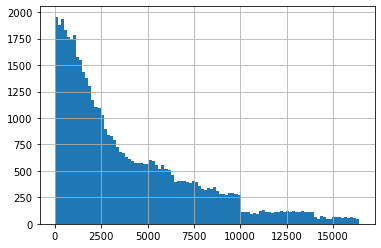

In [16]:
data.Restaurant_id.hist(bins=100)

–ü—Ä–∏–∑–Ω–∞–∫ Restaurant_id - —á–∏—Å–ª–æ–≤–æ–π; –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —É–Ω–∏–∫–∞–ª—å–Ω—ã–º –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–æ–Ω–Ω—ã–º –Ω–æ–º–µ—Ä–æ–º —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –∏ –∏–º–µ–µ—Ç –Ω–µ—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å –æ–±—Ä—ã–≤–æ–º —Å–ª–µ–≤–∞.

25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 1111.0, 75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 5918.0, IQR: 4807.0,  –ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [-6099.5, 13128.5].


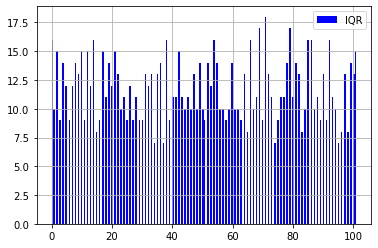

In [17]:
# —Ä–∞—Å—Å—á–∏—Ç–∞–µ–º –≥—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤, –µ—Å–ª–∏ —Ç–∞–∫–æ–≤—ã–µ –∏–º–µ—é—Ç—Å—è
median = data.Restaurant_id.median()
IQR = data.Restaurant_id.quantile(0.75) - data.Restaurant_id.quantile(0.25)
perc25 = data.Restaurant_id.quantile(0.25)
perc75 = data.Restaurant_id.quantile(0.75)
print('25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: {},'.format(perc25),
      '75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "–ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

data.Restaurant_id.loc[data.Restaurant_id.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 200, 
                                                                        range = (0, 101),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

–ò–º–µ–µ–º –∑–∞–≥–∞–¥–æ—á–Ω—ã–µ —á–µ—Ä–µ–¥—É—é—â–∏–µ—Å—è —É–ø–ª–æ—Ç–Ω–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è–µ–º—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª.     
–†–∞—Å—á–µ—Ç –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞–ª–∏—á–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤, –æ–¥–Ω–∞–∫–æ –º—ã –Ω–µ –∑–Ω–∞–µ–º –ø—Ä–∏—Ä–æ–¥—É –¥–∞–Ω–Ω–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –∏ –Ω–µ –º–æ–∂–µ–º —Å—É–¥–∏—Ç—å –æ –≤–æ–∑–º–æ–∂–Ω–æ–º —Ä–∞–∑–±—Ä–æ—Å–µ –¥–∞–Ω–Ω—ã—Ö.     


### City    
     
–ü—É—Ç—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç.     

In [18]:
len(data.City.value_counts())

31

In [19]:
data.City.value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

<AxesSubplot:>

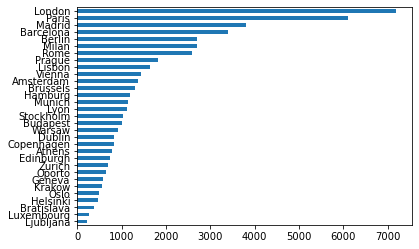

In [20]:
data['City'].value_counts(ascending=True).plot(kind='barh')

City - –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫.    
–†–µ—Å—Ç–æ—Ä–∞–Ω—ã –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≥–æ—Ä–æ–¥–æ–≤ - 31, –≤—Å–µ –≥–æ—Ä–æ–¥–∞ –ï–≤—Ä–æ–ø–µ–π—Å–∫–∏–µ.   

In [21]:
# –ü—Ä–∏–∑–Ω–∞–∫ is_capital - —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –≥–æ—Ä–æ–¥ —Å—Ç–æ–ª–∏—Ü–µ–π

data['is_capital'] = data.apply(lambda x: 1 if x.City == 'Paris' or x.City == 'Stockholm' or x.City == 'London' 
                            or x.City == 'Berlin' or x.City == 'Bratislava' or x.City == 'Vienna' 
                            or x.City == 'Rome' or x.City == 'Madrid' or x.City == 'Dublin' 
                            or x.City == 'Brussels' or x.City == 'Warsaw' or x.City == 'Budapest'
                            or x.City == 'Copenhagen' or x.City == 'Amsterdam' or x.City == 'Lisbon' 
                            or x.City == 'Prague' or x.City == 'Oslo' or x.City == 'Helsinki'
                            or x.City == 'Ljubljana' or x.City == 'Athens' or x.City == 'Luxembourg' 
                            else 0, axis=1)

In [22]:
# dummy-–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ —Å—Ç–æ–ª–±—Ü–∞ City

dummies = pd.get_dummies(data['City'])
data = pd.concat([data, dummies], axis=1)

In [23]:
data.sample(5)

Restaurant_id    City  \
6015           631.0    Oslo   
2868            72.0    Oslo   
28853          346.0  Madrid   
34726         3531.0  Prague   
40261          261.0  Oporto   

                                           Cuisine Style  Ranking  Rating  \
6015                                                 NaN    632.0     4.5   
2868   ['European', 'Wine Bar', 'Scandinavian', 'Norw...     73.0     4.5   
28853  ['Mediterranean', 'European', 'Spanish', 'Vege...    347.0     4.5   
34726                                      ['Fast Food']   3539.0     3.0   
40261                                                NaN    875.0     0.0   

      Price Range  Number of Reviews  \
6015          NaN                6.0   
2868     $$ - $$$              159.0   
28853    $$ - $$$              270.0   
34726         NaN                6.0   
40261         NaN                9.0   

                                                 Reviews  \
6015                                            [[], []]   
2868   [['Nice and professional', 'Great atmosphere a...   
28853  [['Good restaurant with attentive service', 'F...   
34726  [['Offer of the day', 'Early food'], ['08/06/2...   
40261               [['Top cocktails!'], ['12/20/2015']]   

                                                  URL_TA      ID_TA  ...  \
6015   /Restaurant_Review-g190479-d11880382-Reviews-K...  d11880382  ...   
2868   /Restaurant_Review-g190479-d691546-Reviews-Mar...    d691546  ...   
28853  /Restaurant_Review-g187514-d9584882-Reviews-Ha...   d9584882  ...   
34726  /Restaurant_Review-g274707-d7124317-Reviews-Ba...   d7124317  ...   
40261  /Restaurant_Review-g189180-d7281369-Reviews-Hi...   d7281369  ...   

       Munich  Oporto  Oslo  Paris  Prague  Rome  Stockholm  Vienna  Warsaw  \
6015        0       0     1      0       0     0          0       0       0   
2868        0       0     1      0       0     0          0       0       0   
28853       0       0     0      0       0     0          0       0       0   
34726       0       0     0      0       1     0          0       0       0   
40261       0       1     0      0       0     0          0       0       0   

       Zurich  
6015        0  
2868        0  
28853       0  
34726       0  
40261       0  

[5 rows x 43 columns]

In [24]:
# –ü—Ä–∏–∑–Ω–∞–∫ City_Life_Quality - —Ä–µ–π—Ç–∏–Ω–≥ –∫–∞—á–µ—Å—Ç–≤–∞ –∂–∏–∑–Ω–∏ –≤ –≥–æ—Ä–æ–¥–∞—Ö

data['City_Life_Quality'] = data.apply(lambda x: 39 if x.City == 'Paris' else 23 if x.City == 'Stockholm' 
                                   else 41 if x.City == 'London' else 13 if x.City == 'Berlin' 
                                   else 38 if x.City == 'Oporto' else 41 if x.City == 'Milan'
                                   else 80 if x.City == 'Bratislava' else 56 if x.City == 'Rome'
                                   else 43 if x.City == 'Barcelona'else 46 if x.City == 'Madrid'
                                   else 33 if x.City == 'Dublin' else 28 if x.City == 'Brussels'
                                   else 82 if x.City == 'Warsaw' else 76 if x.City == 'Budapest'
                                   else 8 if x.City == 'Copenhagen' else 11 if x.City == 'Amsterdam'
                                   else 40 if x.City == 'Lyon' else 19 if x.City == 'Hamburg'
                                   else 37 if x.City == 'Lisbon' else 69 if x.City == 'Prague'
                                   else 25 if x.City == 'Oslo' else 31 if x.City == 'Helsinki'
                                   else 45 if x.City == 'Edinburgh' else 9 if x.City == 'Geneva'
                                   else 74 if x.City == 'Ljubljana' else 89 if x.City == 'Athens'
                                   else 18 if x.City == 'Luxembourg' else 100 if x.City == 'Krakow'
                                   else 1 if x.City == 'Vienna' else 2 if x.City == 'Zurich' 
                                   else 3 if x.City == 'Munich' else 1000, axis=1)

# https://mobilityexchange.mercer.com/Insights/quality-of-living-rankings

In [25]:
# –ü—Ä–∏–∑–Ω–∞–∫ City_Population - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∂–∏—Ç–µ–ª–µ–π –≤ –≥–æ—Ä–æ–¥–∞—Ö 

data['City_Population'] = data.apply(lambda x: 11400000 if x.City == 'Paris' else 2225000 if x.City == 'Stockholm' 
                                   else 14800000 if x.City == 'London' else 4725000 if x.City == 'Berlin' 
                                   else 1540000 if x.City == 'Oporto' else 6200000 if x.City == 'Milan'
                                   else 4600000 if x.City == 'Bratislava' else 3575000 if x.City == 'Rome'
                                   else 4775000 if x.City == 'Barcelona'else 6550000 if x.City == 'Madrid'
                                   else 1390000 if x.City == 'Dublin' else 2700000 if x.City == 'Brussels'
                                   else 2375000 if x.City == 'Warsaw' else 2625000 if x.City == 'Budapest'
                                   else 1680000 if x.City == 'Copenhagen' else 2475000 if x.City == 'Amsterdam'
                                   else 1980000 if x.City == 'Lyon' else 2875000 if x.City == 'Hamburg'
                                   else 2475000 if x.City == 'Lisbon' else 1440000 if x.City == 'Prague'
                                   else 1190000 if x.City == 'Oslo' else 1300000 if x.City == 'Helsinki'
                                   else 537000 if x.City == 'Edinburgh' else 614000 if x.City == 'Geneva'
                                   else 288000 if x.City == 'Ljubljana' else 3350000 if x.City == 'Athens'
                                   else 626000 if x.City == 'Luxembourg' else 1000000 if x.City == 'Krakow'
                                   else 2250000 if x.City == 'Vienna' else 1430000 if x.City == 'Zurich' 
                                   else 2250000 if x.City == 'Munich' else 1000, axis=1)

# https://en.wikipedia.org/wiki/List_of_metropolitan_areas_in_Europe

### Cuisine Style    
      
38410 –∑–∞–ø–∏—Å–µ–π –∏–∑ 50000.    
23% –¥–∞–Ω–Ω—ã—Ö –≤ –ø–∞—Ä–∞–º–µ—Ç—Ä–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç

In [26]:
data['Cuisine Style']

0                  ['European', 'French', 'International']
1                                                      NaN
2        ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                      NaN
4        ['German', 'Central European', 'Vegetarian Fri...
                               ...                        
49995    ['Caribbean', 'Barbecue', 'Jamaican', 'Vegetar...
49996         ['Indian', 'Asian', 'Nepali', 'Bangladeshi']
49997                                                  NaN
49998                                          ['Italian']
49999                                                  NaN
Name: Cuisine Style, Length: 50000, dtype: object

–°–æ—Ö—Ä–∞–Ω–∏–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ–± –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–∏ –¥–∞–Ω–Ω—ã—Ö

In [27]:
data['Nan_Cuisine_Style'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [28]:
data['Cuisine Style'].loc[0]

"['European', 'French', 'International']"

In [29]:
# –ü—Ä–∏–∑–Ω–∞–∫ Num_Cuisine - –∫–æ–ª–∏—á–µ—Å–≤–æ –∫—É—Ö–æ–Ω—å, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –≤ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–µ

data['Num_Cuisine'] = data['Cuisine Style'].str.count(',') + 1
data['Num_Cuisine'].fillna(1, inplace=True)

–ö–∞–∫ –≤–∏–¥–∏–º, –¥–∞–Ω–Ω—ã–µ –Ω–µ "—á–∏—Å—Ç—ã–µ": –∫–∞–∂–¥–∞—è —è—á–µ–π–∫–∞ –ø—Ä–µ–¥—Å–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π —Å–ø–∏—Å–æ–∫ –∏–∑ –Ω–∞–∑–≤–∞–Ω–∏–π —Ä–∞–∑–Ω–æ–≤–∏–¥–Ω–æ—Å—Ç–µ–π –∫—É—Ö–æ–Ω—å. –í—ã—è—Å–Ω–∏–º, —Å–∫–æ–ª—å–∫–æ –≤—Å–µ–≥–æ —Ç–∞–∫–∏—Ö —Ä–∞–∑–Ω–æ–≤–∏–¥–Ω–æ—Å—Ç–µ–π –≤ –≤–≤–µ—Ä–µ–Ω–Ω–æ–º –Ω–∞–º –¥–∞—Ç–∞—Å–µ—Ç–µ.

In [30]:
(pd.Series(data['Cuisine Style'].str.cat(sep=',').replace("[", '').replace("]","").replace(' ', '').replace("'", '').split(',')).value_counts())

VegetarianFriendly    14021
European              12561
Mediterranean          7820
Italian                7433
VeganOptions           5684
                      ...  
Polynesian                2
Xinjiang                  1
Salvadoran                1
Latvian                   1
Burmese                   1
Length: 125, dtype: int64

Cuisine Style - –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫.

125 —Ä–∞–∑–Ω–æ–≤–∏–¥–Ω–æ—Å—Ç–µ–π –∫—É—Ö–æ–Ω—å - –Ω–µ –º–∞–ª–æ.    
–ù–∞–∏–±–æ–ª–µ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã–º —è–≤–ª—è–µ—Ç—Å—è Vegeterian Friendly.    
–ò–∑ —ç—Ç–∏—Ö —Ä–∞–∑–Ω–æ–≤–∏–¥–Ω–æ—Å—Ç–µ–π –º–æ–∂–Ω–æ –≤—ã—á–ª–µ–Ω–∏—Ç—å –≤–µ–≥–∞—Ç–µ—Ä–∏–∞–Ω—Å–∫—É—é –∫—É—Ö–Ω—é (–≤ –Ω–µ—ë –∂–µ –∑–∞—Å—É–Ω–µ–º Vegan Options - –¥–∞ –ø—Ä–æ—Å—Ç—è—Ç –º–µ–Ω—è –≤–µ–≥–∞–Ω—ã), –ª–æ–∫–∞–ª—å–Ω—É—é –∫—É—Ö–Ω—é - –∫—É—Ö–Ω—è —Å—Ç—Ä–∞–Ω—ã (–≤–æ –§—Ä–∞–Ω—Ü–∏–∏- —Ñ—Ä–∞–Ω—Ü—É—Å–∫–∞—è, –≤ –ì–µ—Ä–º–∞–Ω–∏–∏ - –Ω–µ–º–µ—Ü–∫–∞—è –∏ —Ç–¥), –∏, –ø–æ—Å–∫–æ–ª—å–∫—É —ç—Ç–æ –ï–≤—Ä–æ–ø–∞, —Ç–æ –Ω–µ–ª—å–∑—è –∏–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞—Ç—å –ï–≤—Ä–æ–ø–µ–π—Å–∫—É—é –∫—É—Ö–Ω—é - –µ—ë –º–æ–∂–Ω–æ –æ–±–æ–∑–Ω–∞—á–∏—Ç—å –∫–∞–∫ –ø–æ–ø—É–ª—è—Ä–Ω—É—é.      
–û—Å—Ç–∞–ª—å–Ω—ã–µ –∫—É—Ö–Ω–∏ –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.       
       
–ù–∞—á–Ω–µ–º —Å –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.     
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ Vegetarian Friendly –∏ European –Ω–∞ –ø–æ—Ä—è–¥–æ–∫ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –ø–æ—ç—Ç–æ–º—É —Ä–∏—Å–∫–Ω–µ–º –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –≤ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö Cuisine Style —Å –±–æ–ª—å—à–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –º–æ–≥—É—Ç –±—ã—Ç—å —ç—Ç–∏ –¥–≤–∞ –∑–Ω–∞—á–µ–Ω–∏—è.   

In [31]:
data['Cuisine Style'].fillna("['European', 'Vegetarian Friendly']", inplace=True)

–¢–µ–ø–µ—Ä—å –∑–∞–π–º–µ–º—Å—è –ª–æ–∫–∞–ª—å–Ω–æ–π –∫—É—Ö–Ω–∏. –ü–æ—Å–∫–æ–ª—å–∫—É –ª–æ–∫–∞–ª—å–Ω–æ—Å—Ç—å —É –Ω–∞—Å –±—É–¥–µ—Ç –æ–ø—Ä–µ–¥–µ–ª—è—Ç—å—Å—è –ø–æ —Å—Ç—Ä–∞–Ω–µ, —Ç–æ –≤–≤–µ–¥–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä - –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç—Ä–∞–Ω—ã.

In [32]:
# –ü—Ä–∏–∑–Ω–∞–∫ Country - —Å—Ç—Ä–∞–Ω–∞ 

data['Country'] = data.apply(lambda x: 'France' if x.City == 'Paris' or x.City == 'Lyon'
                         else 'Sweden' if x.City == 'Stockholm' else 'UK' if x.City == 'London' 
                         or x.City == 'Edinburgh' else 'Germany' if x.City == 'Berlin' or x.City == 'Munich' 
                         or x.City == 'Hamburg' else 'Portugal' if x.City == 'Oporto' or x.City == 'Lisbon'
                         else 'Italy' if x.City == 'Milan' or x.City == 'Rome' else 'Slovakia' if x.City == 'Bratislava'
                         else 'Austria' if x.City == 'Vienna' else 'Spain' if x.City == 'Barcelona' or x.City == 'Madrid'
                         else 'Ireland' if x.City == 'Dublin' else 'Belgium' if x.City == 'Brussels'
                         else 'Switzerland' if x.City == 'Zurich' or x.City == 'Geneva' 
                         else 'Poland' if x.City == 'Warsaw' or x.City == 'Krakow'
                         else 'Hungary' if x.City == 'Budapest' else 'Denmark' if x.City == 'Copenhagen' 
                         else 'Netherlands' if x.City == 'Amsterdam' else 'Czech Republic' if x.City == 'Prague'
                         else 'Norway' if x.City == 'Oslo' else 'Finland' if x.City == 'Helsinki'
                         else 'Slovenia' if x.City == 'Ljubljana' else 'Greece' if x.City == 'Athens'
                         else 'Luxembourg' if x.City == 'Luxembourg' else 1000, axis=1)

In [33]:
len(data['Country'].value_counts())

22

In [34]:
# –ü—Ä–∏–∑–Ω–∞–∫ local_cuisine - –Ω–∞–ª–∏—á–∏–µ –ª–æ–∫–∞–ª—å–Ω–æ–π –∫—É—Ö–Ω–∏ –≤ Cuisine Style

data['local_cuisine'] = 0
 
# –≤–≤–µ–¥–µ–º –¥–≤–∞ —Å–ø–∏—Å–∫–∞ - —Å—Ç—Ä–∞–Ω—ã, –∫–æ—Ç–æ—Ä—ã–µ –µ—Å—Ç—å –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ, –∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ —Å—Ç—Ä–∞–Ω–∞–º –Ω–∞–∑–≤–∞–Ω–∏—è –∫—É—Ö–æ–Ω—å

list_of_Countries = ['France', 'Sweden', 'UK', 'Germany', 'Portugal', 'Italy', 'Slovakia', 'Austria',
                     'Spain', 'Ireland', 'Belgium', 'Switzerland', 'Poland', 'Hungary', 'Denmark', 
                     'Netherlands', 'Czech Republic', 'Norway', 'Finland', 'Slovenia', 'Greece',
                     'Luxembourg']

list_of_Country_Cuisines = ['French', 'Swedish', 'British', 'German', 'Portuguese', 'Italian', 'Slovak',
                    'Austrian', 'Spanish', 'Irish', 'Belgian', 'Swiss', 'Polish', 'Hungarian', 'Danish',
                    'Dutch', 'Czech', 'Norwegian', 'Finnish', 'Slovenian', 'Greek', 'Luxembourg']

# –î–ª—è –∫–∞–∂–¥–æ–π –ª–æ–∫–∞–ª—å–Ω–æ–π –∫—É—Ö–Ω–∏ —Å—Ç—Ä–∞–Ω—ã –ø—Ä–æ–≤–µ—Ä—è–µ–º —É—Å–ª–æ–≤–∏–µ –Ω–∞–ª–∏—á–∏—è —ç—Ç–æ–π –∫—É—Ö–Ω–∏ –≤ Cuisine Style –∏ —Å—Ç—Ä–∞–Ω—É 
# (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ñ—Ä–∞–Ω—Ü—É–∑—Å–∫–∞—è –∫—É—Ö–Ω—è –≤ –ò—Ç–∞–ª–∏–∏ –Ω–µ –±—É–¥–µ—Ç –ª–æ–∫–∞–ª—å–Ω–æ–π, –∞ –≤–æ –§—Ä–∞–Ω—Ü–∏–∏ - –¥–∞)

for i in range(len(list_of_Country_Cuisines)):
    data.loc[(data['Cuisine Style'].str.contains(list_of_Country_Cuisines[i])) & (data.Country == list_of_Countries[i]), 'local_cuisine'] = 1

–¢–µ–ø–µ—Ä—å –≤–æ–∑—å–º–µ–º—Å—è –∑–∞ –≤–µ–≥–∞—Ç–µ—Ä–∏–∞–Ω—Å–∫–∏–µ –∫—É—Ö–Ω–∏ - –≤—ã–¥–µ–ª–∏–º Vegeterian Frienly –∏ Vegan Option –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π –æ–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫

In [35]:
# –ü—Ä–∏–∑–Ω–∞–∫ vegeterian_friendly - –Ω–∞–ª–∏—á–∏–µ –≤ Cuisine Style –≤–µ–≥–µ—Ç–∞—Ä–∏–∞–Ω—Å–∫–æ–≥–æ –∏–ª–∏ –≤–µ–≥–∞–Ω—Å–∫–æ–≥–æ –º–µ–Ω—é

data['vegeterian_friendly'] = 0
data.loc[data['Cuisine Style'].str.contains('Vegetarian') == True, 'vegeterian_friendly'] = 1
data.loc[data['Cuisine Style'].str.contains('Vegan') == True, 'vegeterian_friendly'] = 1

–í—ã–¥–µ–ª–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä pop_cuisine –¥–ª—è –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–π –∫—É—Ö–Ω–∏.

In [36]:
# –ü—Ä–∏–∑–Ω–∞–∫ pop_cuisine - –Ω–∞–ª–∏—á–∏–µ –≤ Cuisine Style –µ–≤—Ä–æ–ø–µ–π—Å–∫–æ–≥–æ (European) –º–µ–Ω—é

data['pop_cuisine'] = 0
data.loc[data['Cuisine Style'].str.contains('European') == True, 'pop_cuisine'] = 1

–ò, –Ω–∞–∫–æ–Ω–µ—Ü, –≤—ã–¥–µ–ª–∏–º –¥–ª—è –∫–∞–∂–¥–æ–π –∫—É—Ö–Ω–∏ –æ—Ç–¥–µ–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä. –ö—É—Ö–Ω–∏ Vegeterien Friendly, Vegan Option –∏ European –ø–æ–¥ —Ä–∞–∑–¥–∞—á—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —É–∂–µ –ø–æ–ø–∞–ª–∏ –≤—ã—à–µ, –ø–æ—ç—Ç–æ–º—É —Ç–µ–ø–µ—Ä—å –æ–±–æ–π–¥–µ–º—Å—è –±–µ–∑ –Ω–∏—Ö.    
–¢–µ –∫—É—Ö–Ω–∏, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Å–º–æ—Ç—Ä–µ–ª–∏, –∫–∞–∫ –ª–æ–∫–∞–ª—å–Ω—ã–µ, –æ—Å—Ç–∞—é—Ç—Å—è –Ω–∞ —Ä–∞–∑–¥–∞—á–µ –ø–æ—Ç–æ–º—É –∫–∞–∫ –æ–Ω–∏ –º–æ–≥—É—Ç –≤—Å—Ç—Ä–µ—á–∞—Ç—å—Å—è –Ω–µ —Ç–æ–ª—å–∫–æ –≤ —Å—Ç—Ä–∞–Ω–µ, –≥–¥–µ –æ–Ω–∏ –ª–æ–∫–∞–ª—å–Ω—ã–µ (–ø—Ä–∏–º–µ—Ä —Å —Ñ—Ä–∞–Ω—Ü—É–∑—Å–∫–æ–π –∫—É—Ö–Ω–µ–π –≤ –ò—Ç–∞–ª–∏–∏).

In [37]:
# dummy-–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ —Å—Ç–æ–ª–±—Ü–∞ Cuisine Style

Cuisine_Style_List = list(set(data['Cuisine Style'].str.cat(sep=',').replace("[", '').replace("]","").replace("'", '').replace(' ', '').split(',')))
# 'Vegetarian', 'Vegan', 'European' –∏—Å–∫–ª—é—á–µ–Ω—ã, —Ç–∫ –æ–Ω–∏ –≤—ã–Ω–µ—Å–µ–Ω—ã –æ—Ç–¥–µ–ª—å–Ω–æ –∫–∞–∫ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∏ Vegeterian Friendly
Cuisine_Style_List = [a for a in Cuisine_Style_List if a != 'VegetarianFriendly' and a != 'VeganOptions' and a != 'European']

for i in range(len(Cuisine_Style_List)):
    data[Cuisine_Style_List[i]] = 0
    data.loc[data['Cuisine Style'].str.contains(Cuisine_Style_List[i], case=False, na=False), Cuisine_Style_List[i]] = 1

In [38]:
city_list = list(data.City.unique())

In [39]:
# –ü—Ä–∏–∑–Ω–∞–∫ Pizza_Num - –≤ –∫–∞–∫–æ–º –≥–æ—Ä–æ–¥–µ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø–∏—Ü—Ü–µ—Ä–∏–π

for city in city_list:
    data.loc[data.City == city, 'Pizza_Num'] = data.loc[data.City == city, 'Pizza'].sum()

In [40]:
# –ü—Ä–∏–∑–Ω–∞–∫ restaurant_num_in_City - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ –≥–æ—Ä–æ–¥–µ

#data['restaurant_num_in_City'] = 0
for city in city_list:
    data.loc[data.City == city, 'restaurant_num_in_City'] = data[data.City == city].City.count()

In [41]:
# dummy –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è Country

dummies = pd.get_dummies(data['Country'])
data = pd.concat([data, dummies], axis=1)

### Ranking      
      
–ü—É—Å—Ç—ã—Ö —è—á–µ–µ–∫ –Ω–µ—Ç      

In [42]:
data.Ranking.sample(5)

20913    5347.0
37503    1588.0
31758    1348.0
28133    4126.0
668      2890.0
Name: Ranking, dtype: float64

<AxesSubplot:>

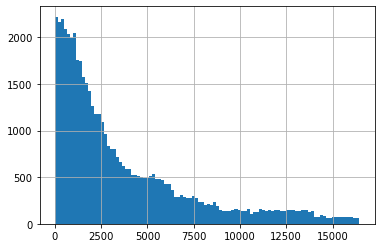

In [43]:
data.Ranking.hist(bins=100)

Ranking - –ø—Ä–∏–∑–Ω–∞–∫ —á–∏—Å–ª–æ–≤–æ–π, –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–π.   
–ö–∞–∫ –≤–∏–¥–∏–º, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ Ranking –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–µ –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ Restaurant_id. –î–∞–Ω–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –¥–∞–µ—Ç –Ω–∞–º –æ—Å–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–¥–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ —ç—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–≥—É—Ç –¥—É–±–ª–∏—Ä–æ–≤–∞—Ç—å –¥—Ä—É–≥ –¥—Ä—É–≥–∞.     
–ò—Å—Ö–æ–¥—è –∏–∑ –¥–∞–Ω–Ω–æ–≥–æ –Ω–∞–º –æ–ø–∏—Å–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞, Ranking - —ç—Ç–æ —Ä–∞–Ω–≥ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥–∏—Ö —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ —ç—Ç–æ–º –≥–æ—Ä–æ–¥–µ.    
–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–µ—Ç –Ω–∞–º –æ—Å–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ Ranking –∏ City –∫–∞–∫-—Ç–æ —Å–≤—è–∑–∞–Ω—ã. –ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ Ranking –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –æ–¥–Ω–æ–≥–æ –≥–æ—Ä–æ–¥–∞.

<AxesSubplot:>

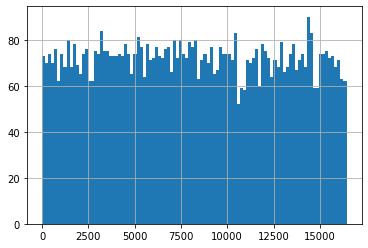

In [44]:
data['Ranking'][data['City'] =='London'].hist(bins=100)

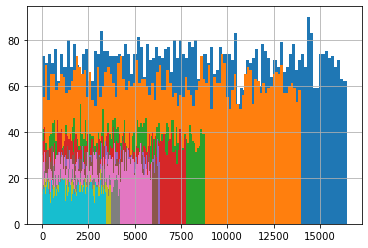

In [45]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–æ–ø 10 –≥–æ—Ä–æ–¥–æ–≤
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=100)
plt.show()

–ü–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ Ranking –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –∫–∞–∂–¥–æ–≥–æ –≥–æ—Ä–æ–¥–∞, –ø—Ä–æ—Å—Ç–æ –≤ –±–æ–ª—å—à–∏—Ö –≥–æ—Ä–æ–¥–∞—Ö –±–æ–ª—å—à–µ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤, –∏–∑-–∑–∞ —ç—Ç–æ–≥–æ –∏–º–µ–µ–º —Å–º–µ—â–µ–Ω–∏–µ.     

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–Ω–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å Ranking –ø–æ –≥–æ—Ä–æ–¥–∞–º.

In [46]:
list_of_City = data.City.unique()

In [47]:
# –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∞ Restaurant_id –∏ Ranking 
# (x - x.mean)/Standart_Deviation

data['std_id'] = 0 
data['std_Ranking'] = 0
#data = data.sort_values(by = ['City', 'Ranking'], axis=0).reset_index(drop=True)
for City in list_of_City:
    loc_data = data[data.City == City]
    scale_features_std = StandardScaler() 
    # –ü—Ä–æ–Ω–æ—Ä–º–∏—Ä—É–µ–º –∑–∞ –æ–¥–Ω–æ –∏ Restaurant_id
    std_id_Ranking = scale_features_std.fit_transform(loc_data[['Restaurant_id','Ranking']]) 
    j=0
    for i in data.index[data['City']==City]:
        data.loc[i, 'std_id']= pd.DataFrame(std_id_Ranking[:,0]).loc[j][0]
        data.loc[i, 'std_Ranking'] = pd.DataFrame(std_id_Ranking[:,1]).loc[j][0]
        j += 1

In [48]:
# –ù–æ—Ä–º–∏—Ä–æ–≤–∫–∞ min-max –¥–ª—è Restaurant_id –∏ Ranking 
# (x - x.min)/(x.max = x.min)

data['min_max_id'] = 0 
data['min_max_Ranking'] = 0
#data = data.sort_values(by = ['City', 'Ranking'], axis=0).reset_index(drop=True)
for City in list_of_City:
    loc_data = data[data.City == City]
    scale_features_mm = MinMaxScaler()  
    min_max_id_Ranking = scale_features_mm.fit_transform(loc_data[['Restaurant_id','Ranking']]) 
    j=0
    for i in data.index[data['City']==City]:
        data.loc[i, 'min_max_id']= pd.DataFrame(min_max_id_Ranking[:,0]).loc[j][0]
        data.loc[i, 'min_max_Ranking'] = pd.DataFrame(min_max_id_Ranking[:,1]).loc[j][0]
        j += 1

In [49]:
#  –ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –æ—Ç–æ–±—Ä–∞–∂–∞—é—Ç—Å—è –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, —Ä–∞—Å–ø–µ—á–∞—Ç–∞–µ–º –∫ –ø—Ä–∏–º–µ—Ä—É –†–∏–º
data[data.City == 'Rome'].head(10)

Restaurant_id  City                                      Cuisine Style  \
9           4209.0  Rome                  ['Italian', 'Pizza', 'Fast Food']   
34          2427.0  Rome                               ['Italian', 'Pizza']   
37          5209.0  Rome                     ['Japanese', 'Sushi', 'Asian']   
82           361.0  Rome  ['Italian', 'Pizza', 'Mediterranean', 'Barbecu...   
111         5296.0  Rome                                        ['Italian']   
123         3015.0  Rome  ['Italian', 'Pizza', 'Mediterranean', 'Europea...   
126         2423.0  Rome  ['Italian', 'Pizza', 'Mediterranean', 'Europea...   
137          820.0  Rome        ['Italian', 'Pizza', 'Vegetarian Friendly']   
141         4157.0  Rome                                        ['Italian']   
172         3233.0  Rome  ['Italian', 'Mediterranean', 'Gluten Free Opti...   

     Ranking  Rating Price Range  Number of Reviews  \
9     4210.0     4.0           $               55.0   
34    2428.0     4.5           $               69.0   
37    5210.0     5.0    $$ - $$$                2.0   
82     362.0     4.5    $$ - $$$              288.0   
111   5298.0     4.0         NaN                9.0   
123   3016.0     3.0    $$ - $$$             1012.0   
126   2424.0     3.5    $$ - $$$              481.0   
137    821.0     5.0           $              134.0   
141   4158.0     4.0    $$ - $$$              182.0   
172   3234.0     3.5    $$ - $$$              209.0   

                                               Reviews  \
9    [['Clean efficient staff', 'Nice little pizza ...   
34   [['Delicious pizza and friendly staff', 'Best ...   
37                                            [[], []]   
82   [['So cosy and beautiful', 'Excellent! Loved t...   
111                                           [[], []]   
123  [['Don‚Äôt go there!', 'Really bad!'], ['12/30/2...   
126  [['Good pizza and atmosphere', 'Great little p...   
137  [['very specific', 'Yummy üëç'], ['09/26/2017', ...   
141  [['Charming Terrace Bar and Restaurant!', 'Nic...   
172  [['Very good aperitivo!', 'Very good'], ['10/3...   

                                                URL_TA      ID_TA  ...  \
9    /Restaurant_Review-g187791-d8020681-Reviews-Qu...   d8020681  ...   
34   /Restaurant_Review-g187791-d5263694-Reviews-Pi...   d5263694  ...   
37   /Restaurant_Review-g187791-d13322935-Reviews-G...  d13322935  ...   
82   /Restaurant_Review-g187791-d7361724-Reviews-In...   d7361724  ...   
111  /Restaurant_Review-g187791-d11951657-Reviews-V...  d11951657  ...   
123  /Restaurant_Review-g187791-d2226584-Reviews-Fr...   d2226584  ...   
126  /Restaurant_Review-g187791-d5504724-Reviews-Ri...   d5504724  ...   
137  /Restaurant_Review-g187791-d4085056-Reviews-Pi...   d4085056  ...   
141  /Restaurant_Review-g187791-d2321047-Reviews-So...   d2321047  ...   
172  /Restaurant_Review-g187791-d11998026-Reviews-E...  d11998026  ...   

     Slovakia  Slovenia  Spain  Sweden  Switzerland  UK    std_id  \
9           0         0      0       0            0   0  0.390736   
34          0         0      0       0            0   0 -0.440536   
37          0         0      0       0            0   0  0.857218   
82          0         0      0       0            0   0 -1.404289   
111         0         0      0       0            0   0  0.897802   
123         0         0      0       0            0   0 -0.166244   
126         0         0      0       0            0   0 -0.442402   
137         0         0      0       0            0   0 -1.190173   
141         0         0      0       0            0   0  0.366479   
172         0         0      0       0            0   0 -0.064551   

     std_Ranking  min_max_id  min_max_Ranking  
9       0.721903    0.421321         0.707752  
34     -0.316155    0.242943         0.408105  
37      1.304427    0.521421         0.875904  
82     -1.519650    0.036136         0.060703  
111     1.355689    0.530130         0.890701  
123     0.026369    0.

<AxesSubplot:>

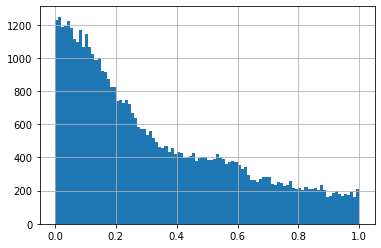

In [50]:
data['min_max_id'].hist(bins=100)

<AxesSubplot:>

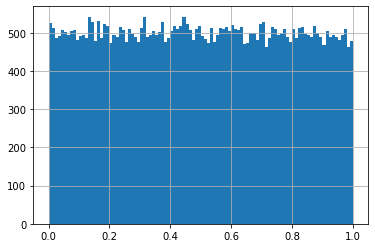

In [51]:
data['min_max_Ranking'].hist(bins=100)

<AxesSubplot:>

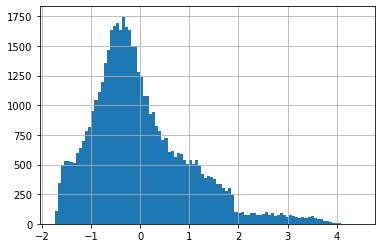

In [52]:
data['std_id'].hist(bins=100)

<AxesSubplot:>

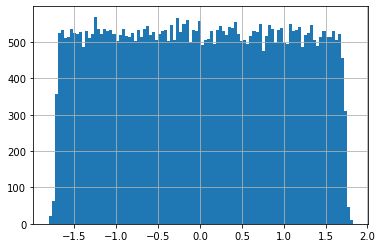

In [53]:
data['std_Ranking'].hist(bins=100)

–ü—Ä–æ–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–≤ Ranking –≤ —Ä–∞–∑—Ä–µ–∑–µ –æ–¥–Ω–æ–≥–æ –≥–æ—Ä–æ–¥–∞, –ø–æ–ª—É—á–∏–ª–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.
–ö–∞–∫ –ø–æ–±–æ—á–Ω—ã–π —ç—Ñ—Ñ–µ–∫—Ç, –ø–æ–ª—É—á–∏–ª–∏ –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –ø—Ä–æ–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–π Restaurant_id, —É –∫–æ—Ç–æ—Ä–æ–≥–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∞ –¥–∞–ª–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–æ —Å–º–µ—â–µ–Ω–∏–µ–º –≤–ø—Ä–∞–≤–æ, —Ç–æ–≥–¥–∞ –∫–∞–∫ min-max –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∞ –∏–∑–º–µ–Ω–∏–ª–∞ –ª–∏—à—å –ø–æ—Ä—è–¥–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–π, –Ω–µ –ø–æ–º–µ–Ω—è–≤ –ø—Ä–∏ —ç—Ç–æ–º —Ñ–æ—Ä–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (—Ç–∞–∫–∞—è –∂–µ, –∫–∞–∫ –∏ —É –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ Restaurant_id).    

In [54]:
# –ü—Ä–∏–∑–Ω–∞–∫ 'relative_rank' - –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è Ranking –∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ –≥–æ—Ä–æ–¥–µ 'rest_number_in_City'

data['relative_rank'] = data['Ranking'] / data['restaurant_num_in_City']

In [55]:
# –ü–∏–∑–Ω–∞–∫ rewiew_in_City - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞—Ö –≥–æ—Ä–æ–¥–∞

for city in city_list:
    data.loc[data.City == city, 'rewiew_in_City'] = data['Number of Reviews'][data.City == city].sum()

In [56]:
# –ü—Ä–∏–∑–Ω–∞–∫ relative_rank_review - –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è Ranking –∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –æ—Ç–∑—ã–≤–æ–≤ –≤ –≥–æ—Ä–æ–¥–µ rewiew_in_City

data['relative_rank_review'] = data['Ranking'] / data['rewiew_in_City']

### Price Range     
     
17361 –ø—É—Å—Ç–∞—è —è—á–µ–π–∫–∞, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –ø–æ—á—Ç–∏ 35% –æ—Ç –≤—Å–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [57]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

Price Range - –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –æ—Ü–µ–Ω–æ—á–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫.      
–ó–∞–ø–æ–º–Ω–∏–º –ø—É—Å—Ç—ã–µ —è—á–µ–π–∫–∏ –∫–∞–∫ –æ—Ç–¥–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –∑–∞–∫–æ–¥–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è –º–æ–¥–µ–ª–∏ –∏ –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º, –ø–æ—Å–∫–æ–ª—å–∫—É —Ä–∞–∑–Ω–∏—Ü–∞ –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å–æ –≤—Å–µ–º–∏ –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–∞.      

In [58]:
data['Price Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

In [59]:
# Price Range - –∫–æ–¥–∏—Ä–æ–≤–∫–∞ (–∑–∞–º–µ–Ω–∞ –ø–æ —Å–ª–æ–≤–∞—Ä—é)

Price_Range_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}

data = data.replace({"Price Range": Price_Range_dict})

In [60]:
data['Price Range'] = data.apply(lambda x: 2 if pd.isna(x['Price Range']) else x['Price Range'], axis=1)

### Reviews    
     
–ù–∞ –ø–µ—Ä–≤—ã–π –≤–∑–≥–ª—è–¥ –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Ç–æ–ª—å–∫–æ 2, –æ–¥–Ω–∞–∫–æ, –ø–æ—Å–º–æ—Ç—Ä–∏–º –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–µ–µ –Ω–∞ –¥–∞–Ω–Ω—ã–µ...    

In [61]:
data.Reviews.value_counts()

[[], []]                                                                                                               8112
[['Great Food! Wide Variety.', 'Dinner'], ['11/26/2017', '05/23/2017']]                                                   2
[['Great Asian Option', 'Wow'], ['10/16/2017', '09/07/2016']]                                                             2
[['Visited the rooftop bar', 'SIXTH FLOOR ROOFTOP BUT YOU CAN ONLY SEE O...'], ['06/27/2017', '10/31/2017']]              2
[['Enjoyable restaurant with indoor and outdo...', 'Delicious food'], ['11/04/2017', '10/31/2017']]                       2
                                                                                                                       ... 
[['Nice and friendly place . . .', 'Good service!'], ['01/06/2018', '07/12/2017']]                                        1
[['Relatively new coffee shop.'], ['06/02/2017']]                                                                         1
[['Explo

–ò–º–µ–µ–º 8112 –∑–∞–ø–∏—Å–µ–π —Å –ø—É—Å—Ç—ã–º–∏ —Å–∫–æ–±–∫–∞–º–∏ - —Ç–æ–∂–µ —Å–≤–æ–µ–≥–æ —Ä–æ–¥–∞ –ø—É—Å—Ç—ã–µ –¥–∞–Ω–Ω—ã–µ, –∑–Ω–∞—á–∏—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤, –ø–æ —Å—É—Ç–∏, 8114 - —ç—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 16% –æ—Ç –≤—Å–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞.     
–í–∏–¥–Ω–æ, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç —Å—Ç—Ä—É–∫—Ç—É—Ä—É –∑–∞–ø–∏—Å–∏ –≤–∏–¥–∞      [['txt_of Review', 'txt_of Review'], ['mm/dd/yyyy', 'mm/dd/yyyy']]     
–î–∞–Ω–Ω—ã–µ —Ç–∞–∫–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã —Å–ª–æ–∂–Ω–æ –ø—Ä–æ–¥—É–±–ª–∏—Ä–æ–≤–∞—Ç—å –≤ —Ä–µ–∞–ª—å–Ω–æ–π –∂–∏–∑–Ω–∏, –µ—Å–ª–∏ –º—ã –∏–º–µ–µ–º –≤–≤–∏–¥—É —Ä–µ–∞–ª—å–Ω—ã—Ö –ª—é–¥–µ–π, –ø–∏—Å–∞–≤—à–∏—Ö –¥–∞–Ω–Ω—ã–µ –æ—Ç–∑—ã–≤—ã, –æ–¥–Ω–∞–∫–æ –≤–∏–¥–∏–º, —á—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –¥–∞–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –≤ –¥–≤—É—Ö –∏–¥–µ–Ω—Ç–∏—á–Ω—ã—Ö —ç–∫–∑–µ–º–ø–ª—è—Ä–∞—Ö –∏ —Ç–∞–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö 50000-8114[–ø—Ä–æ–ø—É—Å–∫–æ–≤]-(41857-1)                                     [–¥–ª–∏–Ω–∞ —Å–ø–∏—Å–∫–∞ value_counts –∑–∞ –º–∏–Ω—É—Å–æ–º —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏] == 30               
–ò—Ç–æ–≥–æ 41856 –∑–∞–ø–∏—Å–µ–π —Å —É–Ω–∏–∫–∞–ª—å–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏                                 
–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ, –Ω–æ –ø—Ä–µ–∂–¥–µ –∑–∞–ø–æ–º–Ω–∏–º –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –æ—Ç–¥–µ–ª—å–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é.

In [62]:
data['Reviews_isna'] = pd.isna(data['Reviews']).astype('uint8')

In [63]:
data.loc[data.Reviews=='[[], []]', 'Reviews_isna'] = 1

In [64]:
data.Reviews.value_counts().index[1:31]

Index(['[['Great Food! Wide Variety.', 'Dinner'], ['11/26/2017', '05/23/2017']]',
       '[['Great Asian Option', 'Wow'], ['10/16/2017', '09/07/2016']]',
       '[['Visited the rooftop bar', 'SIXTH FLOOR ROOFTOP BUT YOU CAN ONLY SEE O...'], ['06/27/2017', '10/31/2017']]',
       '[['Enjoyable restaurant with indoor and outdo...', 'Delicious food'], ['11/04/2017', '10/31/2017']]',
       '[['Delicious'], ['06/06/2017']]',
       '[['Excellent food food', 'Fantastic sushi served tapas style'], ['09/07/2016', '02/21/2016']]',
       '[['Whenever in Madrid, we never miss this gem...', 'Underrated sushi restaurant with very good...'], ['04/11/2017', '12/02/2016']]',
       '[['Very good all around', 'Our first Madrid restaurant'], ['11/20/2017', '10/11/2017']]',
       '[['Excellent'], ['09/03/2015']]',
       '[['Fantastic food, Excellent service', 'Surprising good Indian food in Spain'], ['01/07/2018', '11/08/2017']]',
       '[['Very average food. Over average prices.', 'great food with 

In [65]:
double_Reviews = data.Reviews.value_counts().index[1:31]

In [66]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 206 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant_id           50000 non-null  float64
 1   City                    50000 non-null  object 
 2   Cuisine Style           50000 non-null  object 
 3   Ranking                 50000 non-null  float64
 4   Rating                  50000 non-null  float64
 5   Price Range             50000 non-null  float64
 6   Number of Reviews       46800 non-null  float64
 7   Reviews                 49998 non-null  object 
 8   URL_TA                  50000 non-null  object 
 9   ID_TA                   50000 non-null  object 
 10  sample                  50000 non-null  int64  
 11  is_capital              50000 non-null  int64  
 12  Amsterdam               50000 non-null  uint8  
 13  Athens                  50000 non-null  uint8  
 14  Barcelona               50000 non-nul

In [67]:
for review in double_Reviews:
    display(data[data.Reviews == review])

Restaurant_id    City  \
16920         3536.0  Madrid   
29879         3662.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
16920  ['International', 'Mediterranean', 'Spanish', ...   3538.0     4.0   
29879  ['International', 'Mediterranean', 'Spanish', ...   3664.0     4.0   

       Price Range  Number of Reviews  \
16920          2.0               52.0   
29879          2.0               52.0   

                                                 Reviews  \
16920  [['Great Food! Wide Variety.', 'Dinner'], ['11...   
29879  [['Great Food! Wide Variety.', 'Dinner'], ['11...   

                                                  URL_TA      ID_TA  ...  UK  \
16920  /Restaurant_Review-g187514-d11999956-Reviews-S...  d11999956  ...   0   
29879  /Restaurant_Review-g187514-d11999956-Reviews-S...  d11999956  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
16920 -0.370409    -0.336528    0.354557         0.401567       0.927878   
29879 -0.321823    -0.286673    0.367191         0.415872       0.960923   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
16920        357185.0              0.009905                  0             0  
29879        357185.0              0.010258                  0             0  

[2 rows x 206 columns]

Restaurant_id    City                           Cuisine Style  Ranking  \
36934         3140.0  Madrid  ['Japanese', 'Sushi', 'Asian', 'Thai']   3142.0   
44209         4209.0  Madrid  ['Japanese', 'Sushi', 'Asian', 'Thai']   3270.0   

       Rating  Price Range  Number of Reviews  \
36934     3.5          2.0               77.0   
44209     0.0          2.0               77.0   

                                                 Reviews  \
36934  [['Great Asian Option', 'Wow'], ['10/16/2017',...   
44209  [['Great Asian Option', 'Wow'], ['10/16/2017',...   

                                                  URL_TA     ID_TA  ...  UK  \
36934  /Restaurant_Review-g187514-d2360290-Reviews-Lo...  d2360290  ...   0   
44209  /Restaurant_Review-g187514-d2360290-Reviews-Lo...  d2360290  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
36934 -0.523106    -0.493216     0.31485         0.356608       0.824023   
44209 -0.110901    -0.442569     0.42204         0.371140       0.857592   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
36934        357185.0              0.008797                  0             0  
44209        357185.0              0.009155                  0             0  

[2 rows x 206 columns]

Restaurant_id    City                                   Cuisine Style  \
18388         1229.0  Madrid  ['Bar', 'European', 'Spanish', 'Delicatessen']   
44534         4534.0  Madrid  ['Bar', 'European', 'Spanish', 'Delicatessen']   

       Ranking  Rating  Price Range  Number of Reviews  \
18388   1231.0     4.0          3.0              116.0   
44534   1253.0     0.0          3.0              116.0   

                                                 Reviews  \
18388  [['Visited the rooftop bar', 'SIXTH FLOOR ROOF...   
44534  [['Visited the rooftop bar', 'SIXTH FLOOR ROOF...   

                                                  URL_TA     ID_TA  ...  UK  \
18388  /Restaurant_Review-g187514-d1028622-Reviews-La...  d1028622  ...   0   
44534  /Restaurant_Review-g187514-d1028622-Reviews-La...  d1028622  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
18388 -1.259984    -1.249351    0.123233         0.139646       0.322843   
44534  0.014419    -1.240646    0.454627         0.142144       0.328613   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
18388        357185.0              0.003446                  0             0  
44534        357185.0              0.003508                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
19974          512.0  Madrid   
48949         8949.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
19974  ['Mediterranean', 'European', 'Spanish', 'Vege...    513.0     4.0   
48949  ['Mediterranean', 'European', 'Spanish', 'Vege...    509.0     0.0   

       Price Range  Number of Reviews  \
19974          2.0             1764.0   
48949          2.0             1765.0   

                                                 Reviews  \
19974  [['Enjoyable restaurant with indoor and outdo....   
48949  [['Enjoyable restaurant with indoor and outdo....   

                                                  URL_TA     ID_TA  ...  UK  \
19974  /Restaurant_Review-g187514-d1568045-Reviews-Re...  d1568045  ...   0   
48949  /Restaurant_Review-g187514-d1568045-Reviews-Re...  d1568045  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
19974 -1.536458    -1.533446    0.051339         0.058129       0.134540   
48949  1.716835    -1.535029    0.897323         0.057675       0.133491   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
19974        357185.0              0.001436                  0             0  
48949        357185.0              0.001425                  0             0  

[2 rows x 206 columns]

Restaurant_id   City                        Cuisine Style  Ranking  \
31782         3662.0  Milan                          ['Italian']   3664.0   
43304         3304.0  Paris  ['European', 'Vegetarian Friendly']   7358.0   

       Rating  Price Range  Number of Reviews  \
31782     4.5          1.0                4.0   
43304     0.0          2.0                4.0   

                               Reviews  \
31782  [['Delicious'], ['06/06/2017']]   
43304  [['Delicious'], ['06/06/2017']]   

                                                  URL_TA     ID_TA  ...  UK  \
31782  /Restaurant_Review-g187849-d3954601-Reviews-Ro...  d3954601  ...   0   
43304  /Restaurant_Review-g187147-d8602388-Reviews-A_...  d8602388  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
31782  0.077774     0.310145    0.366273         0.583838       1.360059   
43304 -0.831186     0.103833    0.236371         0.525996       1.204650   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
31782        431350.0              0.008494                  0             0  
43304        680827.0              0.010807                  1             0  

[2 rows x 206 columns]

Restaurant_id    City                     Cuisine Style  Ranking  \
29640         3302.0  Madrid  ['Chinese', 'Japanese', 'Asian']   3304.0   
42654         2654.0  Madrid  ['Chinese', 'Japanese', 'Asian']   3146.0   

       Rating  Price Range  Number of Reviews  \
29640     4.0          2.0               53.0   
42654     0.0          2.0               53.0   

                                                 Reviews  \
29640  [['Excellent food food', 'Fantastic sushi serv...   
42654  [['Excellent food food', 'Fantastic sushi serv...   

                                                  URL_TA     ID_TA  ...  UK  \
29640  /Restaurant_Review-g187514-d4914988-Reviews-Xi...  d4914988  ...   0   
42654  /Restaurant_Review-g187514-d4914988-Reviews-Xi...  d4914988  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
29640 -0.460639    -0.429116    0.331094         0.375000       0.866509   
42654 -0.710506    -0.491633    0.266119         0.357062       0.825072   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
29640        357185.0              0.009250                  0             0  
42654        357185.0              0.008808                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
15295          475.0  Madrid   
15565          530.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
15295  ['Japanese', 'Vegetarian Friendly', 'Vegan Opt...    476.0     4.5   
15565  ['Japanese', 'Vegetarian Friendly', 'Vegan Opt...    531.0     4.5   

       Price Range  Number of Reviews  \
15295          2.0               67.0   
15565          2.0               67.0   

                                                 Reviews  \
15295  [['Whenever in Madrid, we never miss this gem....   
15565  [['Whenever in Madrid, we never miss this gem....   

                                                  URL_TA     ID_TA  ...  UK  \
15295  /Restaurant_Review-g187514-d9877640-Reviews-Ra...  d9877640  ...   0   
15565  /Restaurant_Review-g187514-d9877640-Reviews-Ra...  d9877640  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
15295 -1.550725    -1.548086    0.047629         0.053928       0.124836   
15565 -1.529517    -1.526324    0.053143         0.060173       0.139260   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
15295        357185.0              0.001333                  0             0  
15565        357185.0              0.001487                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
10439          468.0  Madrid   
25785          511.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
10439  ['Mediterranean', 'Spanish', 'Vegetarian Frien...    469.0     4.0   
25785  ['Mediterranean', 'Spanish', 'Vegetarian Frien...    512.0     4.0   

       Price Range  Number of Reviews  \
10439          2.0              355.0   
25785          2.0              355.0   

                                                 Reviews  \
10439  [['Very good all around', 'Our first Madrid re...   
25785  [['Very good all around', 'Our first Madrid re...   

                                                  URL_TA     ID_TA  ...  UK  \
10439  /Restaurant_Review-g187514-d1315077-Reviews-El...  d1315077  ...   0   
25785  /Restaurant_Review-g187514-d1315077-Reviews-El...  d1315077  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
10439 -1.553424    -1.550856    0.046927         0.053134       0.123000   
25785 -1.536844    -1.533842    0.051238         0.058015       0.134277   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
10439        357185.0              0.001313                  0             0  
25785        357185.0              0.001433                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
6024          3817.0  Madrid   
47376         7376.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
6024   ['Japanese', 'Peruvian', 'South American', 'Sp...   3819.0     5.0   
47376  ['Japanese', 'Peruvian', 'South American', 'Sp...   4279.0     0.0   

       Price Range  Number of Reviews                          Reviews  \
6024           2.0               16.0  [['Excellent'], ['09/03/2015']]   
47376          2.0               16.0  [['Excellent'], ['09/03/2015']]   

                                                  URL_TA     ID_TA  ...  UK  \
6024   /Restaurant_Review-g187514-d7827387-Reviews-El...  d7827387  ...   0   
47376  /Restaurant_Review-g187514-d7827387-Reviews-El...  d7827387  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
6024  -0.262055    -0.225344    0.382733         0.433470       1.001574   
47376  1.110289    -0.043333    0.739597         0.485695       1.122213   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
6024         357185.0              0.010692                  1             0  
47376        357185.0              0.011980                  1             0  

[2 rows x 206 columns]

Restaurant_id    City  \
38967         1238.0  Madrid   
41171         1171.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
38967  ['Indian', 'Asian', 'Nepali', 'Vegetarian Frie...   1240.0     5.0   
41171  ['Indian', 'Asian', 'Nepali', 'Vegetarian Frie...   1219.0     0.0   

       Price Range  Number of Reviews  \
38967          2.0               22.0   
41171          2.0               22.0   

                                                 Reviews  \
38967  [['Fantastic food, Excellent service', 'Surpri...   
41171  [['Fantastic food, Excellent service', 'Surpri...   

                                                  URL_TA      ID_TA  ...  UK  \
38967  /Restaurant_Review-g187514-d12488993-Reviews-K...  d12488993  ...   0   
41171  /Restaurant_Review-g187514-d12488993-Reviews-K...  d12488993  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
38967 -1.256514    -1.245790    0.124135         0.140668       0.325203   
41171 -1.282349    -1.254099    0.117417         0.138283       0.319696   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
38967        357185.0              0.003472                  0             0  
41171        357185.0              0.003413                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
5086          2981.0  Madrid   
44337         4337.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
5086   ['Mediterranean', 'European', 'Spanish', 'Vege...   2983.0     3.5   
44337  ['Mediterranean', 'European', 'Spanish', 'Vege...   2940.0     0.0   

       Price Range  Number of Reviews  \
5086           2.0              282.0   
44337          2.0              282.0   

                                                 Reviews  \
5086   [['Very average food. Over average prices.', '...   
44337  [['Very average food. Over average prices.', '...   

                                                  URL_TA     ID_TA  ...  UK  \
5086   /Restaurant_Review-g187514-d5618007-Reviews-Ju...  d5618007  ...   0   
44337  /Restaurant_Review-g187514-d5618007-Reviews-Ju...  d5618007  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
5086  -0.584416    -0.556128    0.298907         0.338556       0.782324   
44337 -0.061544    -0.573142    0.434874         0.333674       0.771046   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
5086         357185.0              0.008351                  0             0  
44337        357185.0              0.008231                  0             0  

[2 rows x 206 columns]

Restaurant_id    City                      Cuisine Style  Ranking  \
5240          2406.0  Madrid  ['Italian', 'French', 'European']   2408.0   
36822         2487.0  Madrid  ['Italian', 'French', 'European']   2489.0   

       Rating  Price Range  Number of Reviews  \
5240      4.0          2.0              148.0   
36822     4.0          2.0              148.0   

                                                 Reviews  \
5240   [['Sat night', 'Can\'t even explain.. "A" plac...   
36822  [['Sat night', 'Can\'t even explain.. "A" plac...   

                                                  URL_TA    ID_TA  ...  UK  \
5240   /Restaurant_Review-g187514-d793170-Reviews-Car...  d793170  ...   0   
36822  /Restaurant_Review-g187514-d793170-Reviews-Car...  d793170  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
5240  -0.806135    -0.783641    0.241251         0.273274       0.631524   
36822 -0.774901    -0.751592    0.249373         0.282470       0.652767   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
5240         357185.0              0.006742                  0             0  
36822        357185.0              0.006968                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
8019          2361.0  Madrid   
22998         2312.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
8019   ['Seafood', 'Mediterranean', 'European', 'Span...   2363.0     4.0   
22998  ['Seafood', 'Mediterranean', 'European', 'Span...   2314.0     4.0   

       Price Range  Number of Reviews  \
8019           2.0              190.0   
22998          2.0              190.0   

                                                 Reviews  \
8019   [['Nice restaurant in Madrid', 'Highly reccome...   
22998  [['Nice restaurant in Madrid', 'Highly reccome...   

                                                  URL_TA    ID_TA  ...  UK  \
8019   /Restaurant_Review-g187514-d987900-Reviews-Com...  d987900  ...   0   
22998  /Restaurant_Review-g187514-d987900-Reviews-Com...  d987900  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
8019  -0.823487    -0.801447    0.236739         0.268165       0.619722   
22998 -0.842381    -0.820835    0.231826         0.262602       0.606871   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
8019         357185.0              0.006616                  0             0  
22998        357185.0              0.006478                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
33210         2286.0  Madrid   
49830         9830.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
33210  ['International', 'American', 'Vegetarian Frie...   2288.0     3.5   
49830  ['International', 'American', 'Vegetarian Frie...   2334.0     0.0   

       Price Range  Number of Reviews  \
33210          2.0              327.0   
49830          2.0              327.0   

                                                 Reviews  \
33210  [['Improve your service', 'Great value chain r...   
49830  [['Improve your service', 'Great value chain r...   

                                                  URL_TA     ID_TA  ...  UK  \
33210  /Restaurant_Review-g187514-d2669414-Reviews-Vi...  d2669414  ...   0   
49830  /Restaurant_Review-g187514-d2669414-Reviews-Vi...  d2669414  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
33210 -0.852407    -0.831122    0.229219         0.259650       0.600052   
49830  2.056547    -0.812921    0.985661         0.264873       0.612116   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
33210        357185.0              0.006406                  0             0  
49830        357185.0              0.006534                  0             0  

[2 rows x 206 columns]

Restaurant_id    City       Cuisine Style  Ranking  Rating  \
25251         3575.0  Madrid  ['Spanish', 'Bar']   3577.0     3.5   
39847         3709.0  Madrid  ['Spanish', 'Bar']   3711.0     3.5   

       Price Range  Number of Reviews  \
25251          1.0              217.0   
39847          1.0              217.0   

                                                 Reviews  \
25251  [['Thursday snack', 'Good value for money & go...   
39847  [['Thursday snack', 'Good value for money & go...   

                                                  URL_TA     ID_TA  ...  UK  \
25251  /Restaurant_Review-g187514-d3161682-Reviews-Ce...  d3161682  ...   0   
39847  /Restaurant_Review-g187514-d3161682-Reviews-Ce...  d3161682  ...   0   

        std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
25251 -0.35537    -0.321097    0.358468         0.405995       0.938106   
39847 -0.30370    -0.268077    0.371904         0.421208       0.973249   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
25251        357185.0              0.010014                  0             0  
39847        357185.0              0.010390                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
10183         1225.0  Madrid   
32814         1197.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
10183  ['Mediterranean', 'European', 'Spanish', 'Vege...   1227.0     4.0   
32814  ['Mediterranean', 'European', 'Spanish', 'Vege...   1198.0     4.0   

       Price Range  Number of Reviews  \
10183          2.0              272.0   
32814          2.0              272.0   

                                                 Reviews  \
10183  [['Simply Excellent!', 'Modern!'], ['10/22/201...   
32814  [['Simply Excellent!', 'Modern!'], ['10/22/201...   

                                                  URL_TA     ID_TA  ...  UK  \
10183  /Restaurant_Review-g187514-d7337366-Reviews-La...  d7337366  ...   0   
32814  /Restaurant_Review-g187514-d7337366-Reviews-La...  d7337366  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
10183 -1.261526    -1.250934    0.122832         0.139192       0.321794   
32814 -1.272323    -1.262409    0.120024         0.135899       0.314188   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
10183        357185.0              0.003435                  0             0  
32814        357185.0              0.003354                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
3942          5646.0  Madrid   
27680         5617.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
3942   ['Lebanese', 'Mediterranean', 'Middle Eastern'...   5649.0     3.5   
27680  ['Lebanese', 'Mediterranean', 'Middle Eastern'...   5620.0     3.5   

       Price Range  Number of Reviews  \
3942           2.0              443.0   
27680          2.0              443.0   

                                                 Reviews  \
3942   [['Good Lebanese food', 'Decent place'], ['07/...   
27680  [['Good Lebanese food', 'Decent place'], ['07/...   

                                                  URL_TA     ID_TA  ...  UK  \
3942   /Restaurant_Review-g187514-d3685055-Reviews-Sh...  d3685055  ...   0   
27680  /Restaurant_Review-g187514-d3685055-Reviews-Sh...  d3685055  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
3942   0.443204     0.498742    0.566129         0.641235       1.481511   
27680  0.432022     0.487268    0.563221         0.637943       1.473905   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
3942         357185.0              0.015815                  0             0  
27680        357185.0              0.015734                  0             0  

[2 rows x 206 columns]

Restaurant_id    City Cuisine Style  Ranking  Rating  Price Range  \
21704         2906.0  Madrid   ['Spanish']   2908.0     4.5          2.0   
44992         4992.0  Madrid   ['Spanish']   3149.0     0.0          2.0   

       Number of Reviews                                            Reviews  \
21704               21.0  [['Great coffee and pastries, sandwiches, ver....   
44992               21.0  [['Great coffee and pastries, sandwiches, ver....   

                                                  URL_TA     ID_TA  ...  UK  \
21704  /Restaurant_Review-g187514-d3748757-Reviews-D_...  d3748757  ...   0   
44992  /Restaurant_Review-g187514-d3748757-Reviews-D_...  d3748757  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
21704 -0.613336    -0.585804    0.291387         0.330041       0.762654   
44992  0.191023    -0.490446    0.500551         0.357402       0.825859   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
21704        357185.0              0.008141                  0             0  
44992        357185.0              0.008816                  0             0  

[2 rows x 206 columns]

Restaurant_id    City                 Cuisine Style  Ranking  Rating  \
22924         2359.0  Madrid  ['Spanish', 'Mediterranean']   2361.0     4.5   
36275         2467.0  Madrid  ['Spanish', 'Mediterranean']   2469.0     4.5   

       Price Range  Number of Reviews  \
22924          2.0               16.0   
36275          2.0               16.0   

                                               Reviews  \
22924  [['The real codido madrile√±o'], ['03/31/2017']]   
36275  [['The real codido madrile√±o'], ['03/31/2017']]   

                                                  URL_TA     ID_TA  ...  UK  \
22924  /Restaurant_Review-g187514-d7342803-Reviews-Lo...  d7342803  ...   0   
36275  /Restaurant_Review-g187514-d7342803-Reviews-Lo...  d7342803  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
22924 -0.824258    -0.802238    0.236539         0.267938       0.619197   
36275 -0.782613    -0.759505    0.247368         0.280200       0.647522   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
22924        357185.0              0.006610                  0             0  
36275        357185.0              0.006912                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
3438          1198.0  Madrid   
41423         1423.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
3438   ['Chinese', 'Japanese', 'Sushi', 'Asian', 'Tha...   1199.0     4.0   
41423  ['Chinese', 'Japanese', 'Sushi', 'Asian', 'Tha...   1220.0     0.0   

       Price Range  Number of Reviews  \
3438           2.0              156.0   
41423          2.0              159.0   

                                                 Reviews  \
3438   [['Excellent cuisine, friendly and helpful se....   
41423  [['Excellent cuisine, friendly and helpful se....   

                                                  URL_TA     ID_TA  ...  UK  \
3438   /Restaurant_Review-g187514-d2010743-Reviews-Re...  d2010743  ...   0   
41423  /Restaurant_Review-g187514-d2010743-Reviews-Re...  d2010743  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
3438  -1.271938    -1.262013    0.120124         0.136013       0.314451   
41423 -1.185178    -1.253704    0.142685         0.138397       0.319958   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
3438         357185.0              0.003357                  0             0  
41423        357185.0              0.003416                  0             0  

[2 rows x 206 columns]

Restaurant_id    City Cuisine Style  Ranking  Rating  Price Range  \
1579          2673.0  Madrid  ['American']   2675.0     5.0          1.0   
26696         2485.0  Madrid  ['American']   2487.0     5.0          1.0   

       Number of Reviews                                            Reviews  \
1579                 6.0  [['Healthy vegan doughnuts are posible', 'Best...   
26696                6.0  [['Healthy vegan doughnuts are posible', 'Best...   

                                                  URL_TA      ID_TA  ...  UK  \
1579   /Restaurant_Review-g187514-d13002276-Reviews-D...  d13002276  ...   0   
26696  /Restaurant_Review-g187514-d13002276-Reviews-D...  d13002276  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
1579  -0.703180    -0.677996    0.268024         0.303588       0.701547   
26696 -0.775672    -0.752383    0.249173         0.282243       0.652242   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
1579         357185.0              0.007489                  0             0  
26696        357185.0              0.006963                  0             0  

[2 rows x 206 columns]

Restaurant_id    City                             Cuisine Style  \
13576         1277.0  Madrid  ['Asian', 'Thai', 'Vegetarian Friendly']   
48551         8551.0  Madrid  ['Asian', 'Thai', 'Vegetarian Friendly']   

       Ranking  Rating  Price Range  Number of Reviews  \
13576   1279.0     4.0          2.0               70.0   
48551   1206.0     0.0          2.0               70.0   

                                                 Reviews  \
13576  [['Delicious soup', 'My weekly treat'], ['03/1...   
48551  [['Delicious soup', 'My weekly treat'], ['03/1...   

                                                  URL_TA      ID_TA  ...  UK  \
13576  /Restaurant_Review-g187514-d10440367-Reviews-B...  d10440367  ...   0   
48551  /Restaurant_Review-g187514-d10440367-Reviews-B...  d10440367  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
13576 -1.241475    -1.230359    0.128046         0.145095       0.335431   
48551  1.563367    -1.259243    0.857415         0.136807       0.316286   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
13576        357185.0              0.003581                  0             0  
48551        357185.0              0.003376                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
29661         2988.0  Madrid   
46140         6140.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
29661  ['Chinese', 'Asian', 'Vegetarian Friendly', 'V...   2990.0     3.5   
46140  ['Chinese', 'Asian', 'Vegetarian Friendly', 'V...   3053.0     0.0   

       Price Range  Number of Reviews  \
29661          2.0              148.0   
46140          2.0              148.0   

                                                 Reviews  \
29661  [['Good service and clean', 'Chinese fusion cu...   
46140  [['Good service and clean', 'Chinese fusion cu...   

                                                  URL_TA     ID_TA  ...  UK  \
29661  /Restaurant_Review-g187514-d4748208-Reviews-Re...  d4748208  ...   0   
46140  /Restaurant_Review-g187514-d4748208-Reviews-Re...  d4748208  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
29661 -0.581717    -0.553358    0.299609         0.339351       0.784159   
46140  0.633689    -0.528431    0.615662         0.346503       0.800682   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
29661        357185.0              0.008371                  0             0  
46140        357185.0              0.008547                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
4578          1180.0  Madrid   
28096         1209.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
4578   ['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...   1181.0     4.0   
28096  ['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...   1210.0     4.0   

       Price Range  Number of Reviews  \
4578           2.0              341.0   
28096          2.0              341.0   

                                                 Reviews  \
4578   [['Great food, service and atmosphere', 'Decor...   
28096  [['Great food, service and atmosphere', 'Decor...   

                                                  URL_TA    ID_TA  ...  UK  \
4578   /Restaurant_Review-g187514-d697406-Reviews-Al_...  d697406  ...   0   
28096  /Restaurant_Review-g187514-d697406-Reviews-Al_...  d697406  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
4578  -1.278878    -1.269135    0.118319         0.133969       0.309730   
28096 -1.267696    -1.257660    0.121227         0.137262       0.317335   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
4578         357185.0              0.003306                  0             0  
28096        357185.0              0.003388                  0             0  

[2 rows x 206 columns]

Restaurant_id    City                                 Cuisine Style  \
39797         3001.0  Madrid  ['Diner', 'Mediterranean', 'Spanish', 'Bar']   
47408         7408.0  Madrid  ['Diner', 'Mediterranean', 'Spanish', 'Bar']   

       Ranking  Rating  Price Range  Number of Reviews  \
39797   3003.0     3.5          1.0               71.0   
47408   3001.0     0.0          1.0               71.0   

                                                 Reviews  \
39797  [['Very cozy!', 'Service rate: 1'], ['01/17/20...   
47408  [['Very cozy!', 'Service rate: 1'], ['01/17/20...   

                                                  URL_TA     ID_TA  ...  UK  \
39797  /Restaurant_Review-g187514-d3647024-Reviews-La...  d3647024  ...   0   
47408  /Restaurant_Review-g187514-d3647024-Reviews-La...  d3647024  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
39797 -0.576704    -0.548215    0.300912         0.340827       0.787569   
47408  1.122628    -0.549006    0.742806         0.340599       0.787044   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
39797        357185.0              0.008407                  0             0  
47408        357185.0              0.008402                  0             0  

[2 rows x 206 columns]

Restaurant_id    City                        Cuisine Style  Ranking  \
10594         2677.0  Madrid  ['European', 'Vegetarian Friendly']   2679.0   
12938         2486.0  Madrid  ['European', 'Vegetarian Friendly']   2488.0   

       Rating  Price Range  Number of Reviews  \
10594     5.0          2.0               10.0   
12938     5.0          2.0               10.0   

                                                 Reviews  \
10594  [['Absolutely authentic and delicious!', 'Wond...   
12938  [['Absolutely authentic and delicious!', 'Wond...   

                                                  URL_TA     ID_TA  ...  UK  \
10594  /Restaurant_Review-g187514-d9802625-Reviews-La...  d9802625  ...   0   
12938  /Restaurant_Review-g187514-d9802625-Reviews-La...  d9802625  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
10594 -0.701638    -0.676413    0.268425         0.304042       0.702596   
12938 -0.775287    -0.751987    0.249273         0.282357       0.652505   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
10594        357185.0              0.007500                  1             0  
12938        357185.0              0.006966                  1             0  

[2 rows x 206 columns]

Restaurant_id    City Cuisine Style  Ranking  Rating  Price Range  \
8421          3811.0  Madrid   ['Spanish']   3813.0     4.0          1.0   
24545         3805.0  Madrid   ['Spanish']   3807.0     4.0          1.0   

       Number of Reviews                                            Reviews  \
8421                23.0  [['Happened to drop in', 'Right for a quick bi...   
24545               23.0  [['Happened to drop in', 'Right for a quick bi...   

                                                  URL_TA     ID_TA  ...  UK  \
8421   /Restaurant_Review-g187514-d2477531-Reviews-Ha...  d2477531  ...   0   
24545  /Restaurant_Review-g187514-d2477531-Reviews-Ha...  d2477531  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
8421  -0.264369    -0.227718    0.382132         0.432788       1.000000   
24545 -0.266683    -0.230092    0.381530         0.432107       0.998426   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
8421         357185.0              0.010675                  0             0  
24545        357185.0              0.010658                  0             0  

[2 rows x 206 columns]

Restaurant_id    City Cuisine Style  Ranking  Rating  Price Range  \
13942         1103.0  Madrid   ['Spanish']   1104.0     4.5          2.0   
31238         1212.0  Madrid   ['Spanish']   1213.0     4.5          2.0   

       Number of Reviews                                            Reviews  \
13942               73.0  [['ok for beer, not for dinner'], ['12/20/2017']]   
31238               73.0  [['ok for beer, not for dinner'], ['12/20/2017']]   

                                                  URL_TA     ID_TA  ...  UK  \
13942  /Restaurant_Review-g187514-d8753348-Reviews-Tr...  d8753348  ...   0   
31238  /Restaurant_Review-g187514-d8753348-Reviews-Tr...  d8753348  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
13942 -1.308569    -1.299602    0.110599         0.125227       0.289536   
31238 -1.266539    -1.256473    0.121528         0.137602       0.318122   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
13942        357185.0              0.003091                  0             0  
31238        357185.0              0.003396                  0             0  

[2 rows x 206 columns]

Restaurant_id    City  \
5544          1980.0  Warsaw   
44323         4323.0  Warsaw   

                                           Cuisine Style  Ranking  Rating  \
5544   ['Mediterranean', 'Middle Eastern', 'Italian',...   1981.0     4.0   
44323  ['Mediterranean', 'Middle Eastern', 'Italian',...   1981.0     0.0   

       Price Range  Number of Reviews  \
5544           2.0               16.0   
44323          2.0               16.0   

                                                 Reviews  \
5544   [['Good restaurant for one meal.', 'Olive Gard...   
44323  [['Good restaurant for one meal.', 'Olive Gard...   

                                                  URL_TA     ID_TA  ...  UK  \
5544   /Restaurant_Review-g274856-d3396817-Reviews-Re...  d3396817  ...   0   
44323  /Restaurant_Review-g274856-d3396817-Reviews-Re...  d3396817  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
5544   0.032601     1.483284    0.198278         0.919647       2.141622   
44323  1.128230     1.483284    0.432906         0.919647       2.141622   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
5544          55636.0              0.035606                  0             0  
44323         55636.0              0.035606                  0             0  

[2 rows x 206 columns]

Restaurant_id    City                        Cuisine Style  Ranking  \
36074         2973.0  Madrid  ['European', 'Vegetarian Friendly']   2975.0   
47853         7853.0  Madrid  ['European', 'Vegetarian Friendly']   2931.0   

       Rating  Price Range  Number of Reviews  \
36074     3.5          2.0              229.0   
47853     0.0          2.0              229.0   

                                                 Reviews  \
36074  [['Good Paella', 'Good enough. Nothing more'],...   
47853  [['Good Paella', 'Good enough. Nothing more'],...   

                                                  URL_TA     ID_TA  ...  UK  \
36074  /Restaurant_Review-g187514-d1235635-Reviews-Re...  d1235635  ...   0   
47853  /Restaurant_Review-g187514-d1235635-Reviews-Re...  d1235635  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
36074 -0.587501    -0.559294    0.298105         0.337648       0.780226   
47853  1.294219    -0.576703    0.787426         0.332652       0.768686   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
36074        357185.0              0.008329                  1             0  
47853        357185.0              0.008206                  1             0  

[2 rows x 206 columns]

–í—Å–µ, –∫—Ä–æ–º–µ –æ–¥–Ω–æ–π –∑–∞–ø–∏—Å–∏, –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–Ω–∏–µ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞, –ø—Ä–∏—á–µ–º –ø–æ—á—Ç–∏ –≤–µ–∑–¥–µ —Ä–µ–π—Ç–∏–Ω–≥ —Ä–∞–∑–Ω—ã–π.     
–ù–∞–¥–æ —É–¥–∞–ª–∏—Ç—å –¥—É–±–ª–∏–∫–∞—Ç—ã. –ü–æ —É—Å–ª–æ–≤–∏—é –ø—Ä–æ–µ–∫—Ç–∞ –º–µ—Ç–æ–¥ drop() –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è —Å—Ç—Ä–æ–∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ–ª—å–∑—è, –Ω–æ –ø—Ä–æ –º–µ—Ç–æ–¥ drop_duplicates() –Ω–∏—á–µ–≥–æ –Ω–µ —Å–∫–∞–∑–∞–Ω–æ. –£–¥–∞–ª—è–µ–º! –ù–æ —Å–Ω–∞—á–∞–ª–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –º—ã —É–¥–∞–ª—è–µ–º.

In [68]:
len(data[data.duplicated(subset = ['City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA'])])

37

–î—É–±–ª–∏–∫–∞—Ç–æ–≤ –Ω–∞–π–¥–µ–Ω–æ –±–æ–ª—å—à–µ, –≤–∏–¥–∏–º–æ, –¥—É–±–ª–∏ –∏–º–µ—é—Ç—Å—è –∏ —Å –ø—É—Å—Ç—ã–º–∏ rewiew.

In [69]:
data[data.duplicated(subset = ['City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA'])]

Restaurant_id    City  \
9446          4104.0  Madrid   
11583         3810.0  Madrid   
12628         2329.0  Madrid   
12938         2486.0  Madrid   
15565          530.0  Madrid   
19388         4331.0  Madrid   
22998         2312.0  Madrid   
24545         3805.0  Madrid   
25785          511.0  Madrid   
26551         3240.0  Madrid   
26696         2485.0  Madrid   
27680         5617.0  Madrid   
28096         1209.0  Madrid   
29879         3662.0  Madrid   
31238         1212.0  Madrid   
32814         1197.0  Madrid   
36275         2467.0  Madrid   
36822         2487.0  Madrid   
38946         3242.0  Madrid   
39847         3709.0  Madrid   
40118          118.0  Warsaw   
40704          704.0  Madrid   
41171         1171.0  Madrid   
41423         1423.0  Madrid   
42654         2654.0  Madrid   
44209         4209.0  Madrid   
44323         4323.0  Warsaw   
44337         4337.0  Madrid   
44534         4534.0  Madrid   
44992         4992.0  Madrid   
46140         6140.0  Madrid   
47376         7376.0  Madrid   
47408         7408.0  Madrid   
47853         7853.0  Madrid   
48551         8551.0  Madrid   
48949         8949.0  Madrid   
49830         9830.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
9446                                         ['Spanish']   4106.0     5.0   
11583  ['American', 'German', 'European', 'Central Eu...   3812.0     4.0   
12628                ['European', 'Vegetarian Friendly']   2331.0     4.5   
12938                ['European', 'Vegetarian Friendly']   2488.0     5.0   
15565  ['Japanese', 'Vegetarian Friendly', 'Vegan Opt...    531.0     4.5   
19388                   ['American', 'Spanish', 'Asian']   4333.0     3.5   
22998  ['Seafood', 'Mediterranean', 'European', 'Span...   2314.0     4.0   
24545                                        ['Spanish']   3807.0     4.0   
25785  ['Mediterranean', 'Spanish', 'Vegetarian Frien...    512.0     4.0   
26551                ['European', 'Vegetarian Friendly']   3242.0     4.5   
26696                                       ['American']   2487.0     5.0   
27680  ['Lebanese', 'Mediterranean', 'Middle Eastern'...   5620.0     3.5   
28096  ['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...   1210.0     4.0   
29879  ['International', 'Mediterranean', 'Spanish', ...   3664.0     4.0   
31238                                        ['Spanish']   1213.0     4.5   
32814  ['Mediterranean', 'European', 'Spanish', 'Vege...   1198.0     4.0   
36275                       ['Spanish', 'Mediterranean']   2469.0     4.5   
36822                  ['Italian', 'French', 'European']   2489.0     4.0   
38946                ['European', 'Vegetarian Friendly']   3244.0     5.0   
39847                                 ['Spanish', 'Bar']   3711.0     3.5   
40118                                        ['Italian']   1801.0     0.0   
40704                ['European', 'Vegetarian Friendly']   6274.0     0.0   
41171  ['Indian', 'Asian', 'Nepali', 'Vegetarian Frie...   1219.0     0.0   
41423  ['Chinese', 'Japanese', 'Sushi', 'Asian', 'Tha...   1220.0     0.0   
42654                   ['Chinese', 'Japanese', 'Asian']   3146.0     0.0   
44209             ['Japanese', 'Sushi', 'Asian', 'Thai']   3270.0     0.0   
44323  ['Mediterranean', 'Middle Eastern', 'Italian',...   1981.0     0.0   
44337  ['Mediterranean', 'European', 'Spanish', 'Vege...   2940.0     0.0   
44534     ['Bar', 'European', 'Spanish', 'Delicatessen']   1253.0     0.0   
44992                                        ['Spanish']   3149.0     0.0   
46140  ['Chinese', 'Asian', 'Vegetarian Friendly', 'V...   3053.0     0.0   
47376  ['Japanese', 'Peruvian', 'South American', 'Sp...   4279.0     0.0   
47408       ['Diner', 'Mediterranean', 'Spanish', 'Bar']   3001.0     0.0   
47853                ['European', 'Vegetarian Friendly']   2931.0     0.0   
48551           ['Asian', 'Thai', 'Vegetarian Friendly']   1206.0     0.0   
48949  ['Mediterra

–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, 8 –∑–∞–ø–∏—Å–µ–π —Å –ø—É—Å—Ç—ã–º–∏ Reviews. –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ.

In [70]:
data.drop_duplicates(subset = ['City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA'], inplace = True, keep = 'last')

In [71]:
len(data)

49963

In [72]:
for review in double_Reviews:
    display(data[data.Reviews == review])

Restaurant_id    City  \
29879         3662.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
29879  ['International', 'Mediterranean', 'Spanish', ...   3664.0     4.0   

       Price Range  Number of Reviews  \
29879          2.0               52.0   

                                                 Reviews  \
29879  [['Great Food! Wide Variety.', 'Dinner'], ['11...   

                                                  URL_TA      ID_TA  ...  UK  \
29879  /Restaurant_Review-g187514-d11999956-Reviews-S...  d11999956  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
29879 -0.321823    -0.286673    0.367191         0.415872       0.960923   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
29879        357185.0              0.010258                  0             0  

[1 rows x 206 columns]

Restaurant_id    City                           Cuisine Style  Ranking  \
44209         4209.0  Madrid  ['Japanese', 'Sushi', 'Asian', 'Thai']   3270.0   

       Rating  Price Range  Number of Reviews  \
44209     0.0          2.0               77.0   

                                                 Reviews  \
44209  [['Great Asian Option', 'Wow'], ['10/16/2017',...   

                                                  URL_TA     ID_TA  ...  UK  \
44209  /Restaurant_Review-g187514-d2360290-Reviews-Lo...  d2360290  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
44209 -0.110901    -0.442569     0.42204          0.37114       0.857592   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
44209        357185.0              0.009155                  0             0  

[1 rows x 206 columns]

Restaurant_id    City                                   Cuisine Style  \
44534         4534.0  Madrid  ['Bar', 'European', 'Spanish', 'Delicatessen']   

       Ranking  Rating  Price Range  Number of Reviews  \
44534   1253.0     0.0          3.0              116.0   

                                                 Reviews  \
44534  [['Visited the rooftop bar', 'SIXTH FLOOR ROOF...   

                                                  URL_TA     ID_TA  ...  UK  \
44534  /Restaurant_Review-g187514-d1028622-Reviews-La...  d1028622  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
44534  0.014419    -1.240646    0.454627         0.142144       0.328613   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
44534        357185.0              0.003508                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
48949         8949.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
48949  ['Mediterranean', 'European', 'Spanish', 'Vege...    509.0     0.0   

       Price Range  Number of Reviews  \
48949          2.0             1765.0   

                                                 Reviews  \
48949  [['Enjoyable restaurant with indoor and outdo....   

                                                  URL_TA     ID_TA  ...  UK  \
48949  /Restaurant_Review-g187514-d1568045-Reviews-Re...  d1568045  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
48949  1.716835    -1.535029    0.897323         0.057675       0.133491   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
48949        357185.0              0.001425                  0             0  

[1 rows x 206 columns]

Restaurant_id   City                        Cuisine Style  Ranking  \
31782         3662.0  Milan                          ['Italian']   3664.0   
43304         3304.0  Paris  ['European', 'Vegetarian Friendly']   7358.0   

       Rating  Price Range  Number of Reviews  \
31782     4.5          1.0                4.0   
43304     0.0          2.0                4.0   

                               Reviews  \
31782  [['Delicious'], ['06/06/2017']]   
43304  [['Delicious'], ['06/06/2017']]   

                                                  URL_TA     ID_TA  ...  UK  \
31782  /Restaurant_Review-g187849-d3954601-Reviews-Ro...  d3954601  ...   0   
43304  /Restaurant_Review-g187147-d8602388-Reviews-A_...  d8602388  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
31782  0.077774     0.310145    0.366273         0.583838       1.360059   
43304 -0.831186     0.103833    0.236371         0.525996       1.204650   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
31782        431350.0              0.008494                  0             0  
43304        680827.0              0.010807                  1             0  

[2 rows x 206 columns]

Restaurant_id    City                     Cuisine Style  Ranking  \
42654         2654.0  Madrid  ['Chinese', 'Japanese', 'Asian']   3146.0   

       Rating  Price Range  Number of Reviews  \
42654     0.0          2.0               53.0   

                                                 Reviews  \
42654  [['Excellent food food', 'Fantastic sushi serv...   

                                                  URL_TA     ID_TA  ...  UK  \
42654  /Restaurant_Review-g187514-d4914988-Reviews-Xi...  d4914988  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
42654 -0.710506    -0.491633    0.266119         0.357062       0.825072   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
42654        357185.0              0.008808                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
15565          530.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
15565  ['Japanese', 'Vegetarian Friendly', 'Vegan Opt...    531.0     4.5   

       Price Range  Number of Reviews  \
15565          2.0               67.0   

                                                 Reviews  \
15565  [['Whenever in Madrid, we never miss this gem....   

                                                  URL_TA     ID_TA  ...  UK  \
15565  /Restaurant_Review-g187514-d9877640-Reviews-Ra...  d9877640  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
15565 -1.529517    -1.526324    0.053143         0.060173        0.13926   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
15565        357185.0              0.001487                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
25785          511.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
25785  ['Mediterranean', 'Spanish', 'Vegetarian Frien...    512.0     4.0   

       Price Range  Number of Reviews  \
25785          2.0              355.0   

                                                 Reviews  \
25785  [['Very good all around', 'Our first Madrid re...   

                                                  URL_TA     ID_TA  ...  UK  \
25785  /Restaurant_Review-g187514-d1315077-Reviews-El...  d1315077  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
25785 -1.536844    -1.533842    0.051238         0.058015       0.134277   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
25785        357185.0              0.001433                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
47376         7376.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
47376  ['Japanese', 'Peruvian', 'South American', 'Sp...   4279.0     0.0   

       Price Range  Number of Reviews                          Reviews  \
47376          2.0               16.0  [['Excellent'], ['09/03/2015']]   

                                                  URL_TA     ID_TA  ...  UK  \
47376  /Restaurant_Review-g187514-d7827387-Reviews-El...  d7827387  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
47376  1.110289    -0.043333    0.739597         0.485695       1.122213   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
47376        357185.0               0.01198                  1             0  

[1 rows x 206 columns]

Restaurant_id    City  \
41171         1171.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
41171  ['Indian', 'Asian', 'Nepali', 'Vegetarian Frie...   1219.0     0.0   

       Price Range  Number of Reviews  \
41171          2.0               22.0   

                                                 Reviews  \
41171  [['Fantastic food, Excellent service', 'Surpri...   

                                                  URL_TA      ID_TA  ...  UK  \
41171  /Restaurant_Review-g187514-d12488993-Reviews-K...  d12488993  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
41171 -1.282349    -1.254099    0.117417         0.138283       0.319696   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
41171        357185.0              0.003413                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
44337         4337.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
44337  ['Mediterranean', 'European', 'Spanish', 'Vege...   2940.0     0.0   

       Price Range  Number of Reviews  \
44337          2.0              282.0   

                                                 Reviews  \
44337  [['Very average food. Over average prices.', '...   

                                                  URL_TA     ID_TA  ...  UK  \
44337  /Restaurant_Review-g187514-d5618007-Reviews-Ju...  d5618007  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
44337 -0.061544    -0.573142    0.434874         0.333674       0.771046   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
44337        357185.0              0.008231                  0             0  

[1 rows x 206 columns]

Restaurant_id    City                      Cuisine Style  Ranking  \
36822         2487.0  Madrid  ['Italian', 'French', 'European']   2489.0   

       Rating  Price Range  Number of Reviews  \
36822     4.0          2.0              148.0   

                                                 Reviews  \
36822  [['Sat night', 'Can\'t even explain.. "A" plac...   

                                                  URL_TA    ID_TA  ...  UK  \
36822  /Restaurant_Review-g187514-d793170-Reviews-Car...  d793170  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
36822 -0.774901    -0.751592    0.249373          0.28247       0.652767   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
36822        357185.0              0.006968                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
22998         2312.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
22998  ['Seafood', 'Mediterranean', 'European', 'Span...   2314.0     4.0   

       Price Range  Number of Reviews  \
22998          2.0              190.0   

                                                 Reviews  \
22998  [['Nice restaurant in Madrid', 'Highly reccome...   

                                                  URL_TA    ID_TA  ...  UK  \
22998  /Restaurant_Review-g187514-d987900-Reviews-Com...  d987900  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
22998 -0.842381    -0.820835    0.231826         0.262602       0.606871   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
22998        357185.0              0.006478                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
49830         9830.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
49830  ['International', 'American', 'Vegetarian Frie...   2334.0     0.0   

       Price Range  Number of Reviews  \
49830          2.0              327.0   

                                                 Reviews  \
49830  [['Improve your service', 'Great value chain r...   

                                                  URL_TA     ID_TA  ...  UK  \
49830  /Restaurant_Review-g187514-d2669414-Reviews-Vi...  d2669414  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
49830  2.056547    -0.812921    0.985661         0.264873       0.612116   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
49830        357185.0              0.006534                  0             0  

[1 rows x 206 columns]

Restaurant_id    City       Cuisine Style  Ranking  Rating  \
39847         3709.0  Madrid  ['Spanish', 'Bar']   3711.0     3.5   

       Price Range  Number of Reviews  \
39847          1.0              217.0   

                                                 Reviews  \
39847  [['Thursday snack', 'Good value for money & go...   

                                                  URL_TA     ID_TA  ...  UK  \
39847  /Restaurant_Review-g187514-d3161682-Reviews-Ce...  d3161682  ...   0   

       std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
39847 -0.3037    -0.268077    0.371904         0.421208       0.973249   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
39847        357185.0               0.01039                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
32814         1197.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
32814  ['Mediterranean', 'European', 'Spanish', 'Vege...   1198.0     4.0   

       Price Range  Number of Reviews  \
32814          2.0              272.0   

                                                 Reviews  \
32814  [['Simply Excellent!', 'Modern!'], ['10/22/201...   

                                                  URL_TA     ID_TA  ...  UK  \
32814  /Restaurant_Review-g187514-d7337366-Reviews-La...  d7337366  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
32814 -1.272323    -1.262409    0.120024         0.135899       0.314188   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
32814        357185.0              0.003354                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
27680         5617.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
27680  ['Lebanese', 'Mediterranean', 'Middle Eastern'...   5620.0     3.5   

       Price Range  Number of Reviews  \
27680          2.0              443.0   

                                                 Reviews  \
27680  [['Good Lebanese food', 'Decent place'], ['07/...   

                                                  URL_TA     ID_TA  ...  UK  \
27680  /Restaurant_Review-g187514-d3685055-Reviews-Sh...  d3685055  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
27680  0.432022     0.487268    0.563221         0.637943       1.473905   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
27680        357185.0              0.015734                  0             0  

[1 rows x 206 columns]

Restaurant_id    City Cuisine Style  Ranking  Rating  Price Range  \
44992         4992.0  Madrid   ['Spanish']   3149.0     0.0          2.0   

       Number of Reviews                                            Reviews  \
44992               21.0  [['Great coffee and pastries, sandwiches, ver....   

                                                  URL_TA     ID_TA  ...  UK  \
44992  /Restaurant_Review-g187514-d3748757-Reviews-D_...  d3748757  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
44992  0.191023    -0.490446    0.500551         0.357402       0.825859   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
44992        357185.0              0.008816                  0             0  

[1 rows x 206 columns]

Restaurant_id    City                 Cuisine Style  Ranking  Rating  \
36275         2467.0  Madrid  ['Spanish', 'Mediterranean']   2469.0     4.5   

       Price Range  Number of Reviews  \
36275          2.0               16.0   

                                               Reviews  \
36275  [['The real codido madrile√±o'], ['03/31/2017']]   

                                                  URL_TA     ID_TA  ...  UK  \
36275  /Restaurant_Review-g187514-d7342803-Reviews-Lo...  d7342803  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
36275 -0.782613    -0.759505    0.247368           0.2802       0.647522   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
36275        357185.0              0.006912                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
41423         1423.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
41423  ['Chinese', 'Japanese', 'Sushi', 'Asian', 'Tha...   1220.0     0.0   

       Price Range  Number of Reviews  \
41423          2.0              159.0   

                                                 Reviews  \
41423  [['Excellent cuisine, friendly and helpful se....   

                                                  URL_TA     ID_TA  ...  UK  \
41423  /Restaurant_Review-g187514-d2010743-Reviews-Re...  d2010743  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
41423 -1.185178    -1.253704    0.142685         0.138397       0.319958   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
41423        357185.0              0.003416                  0             0  

[1 rows x 206 columns]

Restaurant_id    City Cuisine Style  Ranking  Rating  Price Range  \
26696         2485.0  Madrid  ['American']   2487.0     5.0          1.0   

       Number of Reviews                                            Reviews  \
26696                6.0  [['Healthy vegan doughnuts are posible', 'Best...   

                                                  URL_TA      ID_TA  ...  UK  \
26696  /Restaurant_Review-g187514-d13002276-Reviews-D...  d13002276  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
26696 -0.775672    -0.752383    0.249173         0.282243       0.652242   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
26696        357185.0              0.006963                  0             0  

[1 rows x 206 columns]

Restaurant_id    City                             Cuisine Style  \
48551         8551.0  Madrid  ['Asian', 'Thai', 'Vegetarian Friendly']   

       Ranking  Rating  Price Range  Number of Reviews  \
48551   1206.0     0.0          2.0               70.0   

                                                 Reviews  \
48551  [['Delicious soup', 'My weekly treat'], ['03/1...   

                                                  URL_TA      ID_TA  ...  UK  \
48551  /Restaurant_Review-g187514-d10440367-Reviews-B...  d10440367  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
48551  1.563367    -1.259243    0.857415         0.136807       0.316286   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
48551        357185.0              0.003376                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
46140         6140.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
46140  ['Chinese', 'Asian', 'Vegetarian Friendly', 'V...   3053.0     0.0   

       Price Range  Number of Reviews  \
46140          2.0              148.0   

                                                 Reviews  \
46140  [['Good service and clean', 'Chinese fusion cu...   

                                                  URL_TA     ID_TA  ...  UK  \
46140  /Restaurant_Review-g187514-d4748208-Reviews-Re...  d4748208  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
46140  0.633689    -0.528431    0.615662         0.346503       0.800682   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
46140        357185.0              0.008547                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
28096         1209.0  Madrid   

                                           Cuisine Style  Ranking  Rating  \
28096  ['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...   1210.0     4.0   

       Price Range  Number of Reviews  \
28096          2.0              341.0   

                                                 Reviews  \
28096  [['Great food, service and atmosphere', 'Decor...   

                                                  URL_TA    ID_TA  ...  UK  \
28096  /Restaurant_Review-g187514-d697406-Reviews-Al_...  d697406  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
28096 -1.267696     -1.25766    0.121227         0.137262       0.317335   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
28096        357185.0              0.003388                  0             0  

[1 rows x 206 columns]

Restaurant_id    City                                 Cuisine Style  \
47408         7408.0  Madrid  ['Diner', 'Mediterranean', 'Spanish', 'Bar']   

       Ranking  Rating  Price Range  Number of Reviews  \
47408   3001.0     0.0          1.0               71.0   

                                                 Reviews  \
47408  [['Very cozy!', 'Service rate: 1'], ['01/17/20...   

                                                  URL_TA     ID_TA  ...  UK  \
47408  /Restaurant_Review-g187514-d3647024-Reviews-La...  d3647024  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
47408  1.122628    -0.549006    0.742806         0.340599       0.787044   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
47408        357185.0              0.008402                  0             0  

[1 rows x 206 columns]

Restaurant_id    City                        Cuisine Style  Ranking  \
12938         2486.0  Madrid  ['European', 'Vegetarian Friendly']   2488.0   

       Rating  Price Range  Number of Reviews  \
12938     5.0          2.0               10.0   

                                                 Reviews  \
12938  [['Absolutely authentic and delicious!', 'Wond...   

                                                  URL_TA     ID_TA  ...  UK  \
12938  /Restaurant_Review-g187514-d9802625-Reviews-La...  d9802625  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
12938 -0.775287    -0.751987    0.249273         0.282357       0.652505   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
12938        357185.0              0.006966                  1             0  

[1 rows x 206 columns]

Restaurant_id    City Cuisine Style  Ranking  Rating  Price Range  \
24545         3805.0  Madrid   ['Spanish']   3807.0     4.0          1.0   

       Number of Reviews                                            Reviews  \
24545               23.0  [['Happened to drop in', 'Right for a quick bi...   

                                                  URL_TA     ID_TA  ...  UK  \
24545  /Restaurant_Review-g187514-d2477531-Reviews-Ha...  d2477531  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
24545 -0.266683    -0.230092     0.38153         0.432107       0.998426   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
24545        357185.0              0.010658                  0             0  

[1 rows x 206 columns]

Restaurant_id    City Cuisine Style  Ranking  Rating  Price Range  \
31238         1212.0  Madrid   ['Spanish']   1213.0     4.5          2.0   

       Number of Reviews                                            Reviews  \
31238               73.0  [['ok for beer, not for dinner'], ['12/20/2017']]   

                                                  URL_TA     ID_TA  ...  UK  \
31238  /Restaurant_Review-g187514-d8753348-Reviews-Tr...  d8753348  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
31238 -1.266539    -1.256473    0.121528         0.137602       0.318122   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
31238        357185.0              0.003396                  0             0  

[1 rows x 206 columns]

Restaurant_id    City  \
44323         4323.0  Warsaw   

                                           Cuisine Style  Ranking  Rating  \
44323  ['Mediterranean', 'Middle Eastern', 'Italian',...   1981.0     0.0   

       Price Range  Number of Reviews  \
44323          2.0               16.0   

                                                 Reviews  \
44323  [['Good restaurant for one meal.', 'Olive Gard...   

                                                  URL_TA     ID_TA  ...  UK  \
44323  /Restaurant_Review-g274856-d3396817-Reviews-Re...  d3396817  ...   0   

        std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
44323  1.12823     1.483284    0.432906         0.919647       2.141622   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
44323         55636.0              0.035606                  0             0  

[1 rows x 206 columns]

Restaurant_id    City                        Cuisine Style  Ranking  \
47853         7853.0  Madrid  ['European', 'Vegetarian Friendly']   2931.0   

       Rating  Price Range  Number of Reviews  \
47853     0.0          2.0              229.0   

                                                 Reviews  \
47853  [['Good Paella', 'Good enough. Nothing more'],...   

                                                  URL_TA     ID_TA  ...  UK  \
47853  /Restaurant_Review-g187514-d1235635-Reviews-Re...  d1235635  ...   0   

         std_id  std_Ranking  min_max_id  min_max_Ranking  relative_rank  \
47853  1.294219    -0.576703    0.787426         0.332652       0.768686   

       rewiew_in_City  relative_rank_review  Price Range_isNAN  Reviews_isna  
47853        357185.0              0.008206                  1             0  

[1 rows x 206 columns]

–¢–µ–ø–µ—Ä—å —Ä–∞–∑–æ–±—å–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä –ø–æ —è—á–µ–π–∫–∞–º –Ω–∞ —Ç–µ–∫—Å—Ç –∏ –Ω–∞ –¥–∞—Ç—É.

In [73]:
# –ü—Ä–∏–∑–Ω–∞–∫ Reviews_txt - —Ç–µ—Å–∫—Ç—ã –æ—Ç–∑—ã–≤–æ–≤ –Ω–µ —Ä–∞–∑–¥–ª–µ–Ω–Ω—ã–µ

data['Reviews_txt'] = data['Reviews'].str.findall(r'\[([^\[^\]]+)\]').str[0]

In [74]:
# –ü—Ä–∏–∑–Ω–∞–∫–∏ Rev_txt_1 –∏ Rev_txt_2 - —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤

txt = data['Reviews_txt'].str.split("', ",expand=True)
txt

0  \
0                         'Good food at your doorstep   
1                                     'Unique cuisine   
2                              'Catch up with friends   
3                                                 NaN   
4                  'Best place to try a Bavarian food   
...                                               ...   
49995  'By far best Chicken burgers and wings in L...   
49996                                'Ok indian food'   
49997                                             NaN   
49998                                             NaN   
49999            'Ethiopian Dining in Pleasant Space'   

                                                    1     2  
0                           'A good hotel restaurant'  None  
1                           'Delicious Nepalese food'  None  
2                                   'Not exceptional'  None  
3                                                 NaN   NaN  
4      'Nice building but improvements need to be...'  None  
...                                               ...   ...  
49995                                   'Really good'  None  
49996                                            None  None  
49997                                             NaN   NaN  
49998                                             NaN   NaN  
49999                                            None  None  

[49963 rows x 3 columns]

In [75]:
txt[txt[2].notnull()]

0                              1        2
22098  '"It\'s \'Indian\  Captain, but not as we kno...  'Avoid'

In [76]:
data.loc[22098, 'Reviews']

'[[\'"It\\\'s \\\'Indian\\\', Captain, but not as we kno...\', \'Avoid\'], [\'10/09/2016\', \'06/26/2016\']]'

In [77]:
# –í—ã—è–≤–∏–ª–∞—Å—å —Å—Ç—Ä–æ–∫–∞, –≥–¥–µ —Å–æ—á–µ—Ç–∞–Ω–∏–µ —Å–∏–º–æ–≤–ª–æ–≤, –∫–æ—Ç–æ—Ä–æ–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è —Å—Ç—Ä–æ–∫–∏, –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ —Ç–µ–∫—Å—Ç–µ –æ—Ç–∑—ã–≤–∞
# –ó–∞–º–µ–Ω—è–µ–º –∫–æ–º–±–∏–Ω–∞—Ü–∏—é —Å–∏–º–≤–æ–ª–æ–≤

data.loc[22098, 'Reviews_txt'] = data['Reviews_txt'][22098].replace("', Captain", 'Captain')

In [78]:
data.loc[22098, 'Reviews_txt']

'\'"It\\\'s \\\'Indian\\Captain, but not as we kno...\', \'Avoid\''

In [79]:
# –í–∫–ª—é—á–∞–µ–º —ç—Ç—É —É–Ω–∏–∫–∞–ª—å–Ω—É—é —Å—Ç—Ä–æ–∫—É –≤ —Ä–∞–∑–±–∏–≤–∫—É
txt = data['Reviews_txt'].str.split("', ",expand=True)
txt

0  \
0                         'Good food at your doorstep   
1                                     'Unique cuisine   
2                              'Catch up with friends   
3                                                 NaN   
4                  'Best place to try a Bavarian food   
...                                               ...   
49995  'By far best Chicken burgers and wings in L...   
49996                                'Ok indian food'   
49997                                             NaN   
49998                                             NaN   
49999            'Ethiopian Dining in Pleasant Space'   

                                                    1  
0                           'A good hotel restaurant'  
1                           'Delicious Nepalese food'  
2                                   'Not exceptional'  
3                                                 NaN  
4      'Nice building but improvements need to be...'  
...                                               ...  
49995                                   'Really good'  
49996                                            None  
49997                                             NaN  
49998                                             NaN  
49999                                            None  

[49963 rows x 2 columns]

In [80]:
# –î–æ–±–∞–≤–ª—è–µ–º –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –≤ –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç
txt.columns = ['Rev_txt_1', 'Rev_txt_2']
data = pd.concat([data, txt], axis=1)

In [81]:
# –ü—Ä–∏–∑–Ω–∞–∫–∏ Rev_date_1 –∏ Rev_date_2 - –¥–∞—Ç—ã –æ—Ç–∑—ã–≤–æ–≤

data['Reviews_date'] = data['Reviews'].str.findall(r'\[([^\[^\]]+)\]').str[-1]
Rew_date = data['Reviews_date'].str.split(",",expand=True)
Rew_date.columns = ['Rev_date_1', 'Rev_date_2']
Rew_date['Rev_date_1'] = pd.to_datetime(Rew_date['Rev_date_1'])
Rew_date['Rev_date_2'] = pd.to_datetime(Rew_date['Rev_date_2'])
data = pd.concat([data, Rew_date], axis=1)

In [82]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 212 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Restaurant_id           49963 non-null  float64       
 1   City                    49963 non-null  object        
 2   Cuisine Style           49963 non-null  object        
 3   Ranking                 49963 non-null  float64       
 4   Rating                  49963 non-null  float64       
 5   Price Range             49963 non-null  float64       
 6   Number of Reviews       46763 non-null  float64       
 7   Reviews                 49961 non-null  object        
 8   URL_TA                  49963 non-null  object        
 9   ID_TA                   49963 non-null  object        
 10  sample                  49963 non-null  int64         
 11  is_capital              49963 non-null  int64         
 12  Amsterdam               49963 non-null  uint8

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–Ω—É–ª–µ–≤—ã—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ Rev_txt_2 –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç Rev_date_2 (–∞ –∏–º–µ–Ω–Ω–æ Rev_date_2 –±–æ–ª—å—à–µ –Ω–∞ 652).     
–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —ç—Ç–∏ —Å—Ç—Ä–æ–∫–∏.

In [83]:
data[data.Rev_txt_2.isna() & data.Rev_date_2.notnull()].Reviews

94       [["Don't eat here if you have a train to catc....
142      [["Rock bar shame it hasn't realised it's not....
211      [["Mexican burrito's", 'My favourite burrito p...
279      [["Wasn't impressed", 'Good'], ['09/02/2017', ...
282      [["Overpriced, Yet The Best Pakistani 'Cafe......
                               ...                        
49157    [["Can't believe the chef tastes his own food"...
49203    [["Go early or you're in a long queue", 'Chang...
49656    [["If only there wouldn't be so much waste!", ...
49770    [["Actual Dutch cuisine but they don't take c....
49980    [["Sorry you've closed", 'Excellent well price...
Name: Reviews, Length: 652, dtype: object

–í–∏–¥–Ω–æ, —á—Ç–æ —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—å (–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–∏–º–≤–æ–ª–æ–≤), –∫–æ—Ç–æ—Ä—ã–π –º—ã –ø—Ä–∏–º–µ–Ω–∏–ª–∏ –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –æ—Ç–∑—ã–≤–æ–≤ –Ω–µ —É–Ω–∏–∫–∞–ª–µ–Ω –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ.

In [84]:
Rev_to_split = data[data.Rev_txt_2.isna() & data.Rev_date_2.notnull()].Reviews_txt
txt = Rev_to_split.str.split('", ',expand=True)
txt

0  \
94     "Don't eat here if you have a train to catc...   
142    "Rock bar shame it hasn't realised it's not...   
211                                "Mexican burrito's   
279                                 "Wasn't impressed   
282      "Overpriced, Yet The Best Pakistani 'Cafe...   
...                                               ...   
49157     "Can't believe the chef tastes his own food   
49203             "Go early or you're in a long queue   
49656       "If only there wouldn't be so much waste!   
49770  "Actual Dutch cuisine but they don't take c...   
49980                            "Sorry you've closed   

                                                     1  
94                                   'Lunchtime drink'  
142                  'Over priced and under served...'  
211             'My favourite burrito place in London'  
279                                             'Good'  
282                         'Good food, zero ambience'  
...                                                ...  
49157                             'Very little Saigon'  
49203                               'Changed the menu'  
49656           'One of the best hangouts in Brussels'  
49770  'Nice restaurant: great service & decent fo...'  
49980                'Excellent well priced breakfast'  

[652 rows x 2 columns]

In [85]:
txt_index = txt.index

In [86]:
for i in txt_index:
    data.loc[i, 'Rev_txt_1'] = txt.loc[i, 0]
    data.loc[i, 'Rev_txt_2'] = txt.loc[i, 1]

In [87]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 212 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Restaurant_id           49963 non-null  float64       
 1   City                    49963 non-null  object        
 2   Cuisine Style           49963 non-null  object        
 3   Ranking                 49963 non-null  float64       
 4   Rating                  49963 non-null  float64       
 5   Price Range             49963 non-null  float64       
 6   Number of Reviews       46763 non-null  float64       
 7   Reviews                 49961 non-null  object        
 8   URL_TA                  49963 non-null  object        
 9   ID_TA                   49963 non-null  object        
 10  sample                  49963 non-null  int64         
 11  is_capital              49963 non-null  int64         
 12  Amsterdam               49963 non-null  uint8

In [88]:
data[data.Rev_txt_2.isna() & data.Rev_date_2.notnull()].Reviews

22958    [[nan, 'Good food with decent service'], ['11/...
28330    [['Good food, attentive staff', 'Sternstra√üe 1...
35933    [['Veramente Italiano [Really Italian]', 'Lunc...
Name: Reviews, dtype: object

In [89]:
data.loc[22958, 'Reviews']

"[[nan, 'Good food with decent service'], ['11/21/2017', '07/21/2017']]"

In [90]:
data.loc[22958, 'Rev_txt_2'] = data.loc[22958, 'Rev_txt_1'].split(',')[1]
data.loc[22958, 'Rev_txt_1'] = 0

In [91]:
data.loc[22958, 'Rev_txt_1']

0

In [92]:
data.loc[28330, 'Reviews']

"[['Good food, attentive staff', 'Sternstra√üe 125, Schanzenviertel, [59], ju...'], ['05/10/2015', '07/05/2014']]"

In [93]:
data.loc[28330, 'Rev_txt_1'] = data.loc[28330, 'Reviews'].split("', '")[0]
data.loc[28330, 'Reviews_txt'] = data.loc[28330, 'Reviews'].split('ju')[0]
data.loc[28330, 'Rev_txt_2'] = data.loc[28330, 'Reviews_txt'].split("', '")[-1]

In [94]:
data.loc[35933, 'Reviews']

"[['Veramente Italiano [Really Italian]', 'Lunch on a Sunday'], ['12/11/2017', '11/19/2017']]"

In [95]:
data.loc[35933, 'Reviews_txt'] = data.loc[35933, 'Reviews'].split('12')[0]
data.loc[35933, 'Rev_txt_1'] = data.loc[35933, 'Reviews_txt'].split(', ')[0]
data.loc[35933, 'Rev_txt_2'] = data.loc[35933, 'Reviews'].split(',')[1]

In [96]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 212 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Restaurant_id           49963 non-null  float64       
 1   City                    49963 non-null  object        
 2   Cuisine Style           49963 non-null  object        
 3   Ranking                 49963 non-null  float64       
 4   Rating                  49963 non-null  float64       
 5   Price Range             49963 non-null  float64       
 6   Number of Reviews       46763 non-null  float64       
 7   Reviews                 49961 non-null  object        
 8   URL_TA                  49963 non-null  object        
 9   ID_TA                   49963 non-null  object        
 10  sample                  49963 non-null  int64         
 11  is_capital              49963 non-null  int64         
 12  Amsterdam               49963 non-null  uint8

–í—ã—Ä–∞–≤–Ω–∏–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤ Rev_txt_2 –∏ Rev_date_2.
–£–¥–∞–ª–∏–º –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã Reviews_txt –∏ Reviews_date, –∞ —Ç–∞–∫–∂–µ Reviews, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω –Ω–∞–º –±–æ–ª—å—à–µ –Ω–µ –Ω—É–∂–µ–Ω.

In [97]:
data.drop(['Reviews', 'Reviews_txt', 'Reviews_date'], axis = 1, inplace = True)

In [98]:
# –ü—Ä–∏–∑–Ω–∞–∫ delta_days - –¥–µ–ª—Ç–∞ –º–µ–∂–¥—É –ø–µ—Ä–≤–æ–π –∏ –ø–æ—Å–ª–µ–¥–Ω–µ–π –¥–∞—Ç–æ–π –æ—Ç–∑—ã–≤–æ–≤, –≤ –¥–Ω—è—Ö

data['delta_days'] = (data['Rev_date_1'] - data['Rev_date_2']).dt.days

In [99]:
data.delta_days = data.apply(lambda x: 0 if pd.isna(x['delta_days']) else x['delta_days'], axis=1)

In [100]:
# –ü—Ä–∏–∑–Ω–∞–∫ Review_weekday_1 –∏ Review_weekday_2 - –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –Ω–∞–ø–∏—Å–∞–Ω–∏—è –æ—Ç–∑—ã–≤–∞

data['Review_weekday_1'] = data['Rev_date_1'].dt.weekday
data['Review_weekday_2'] = data['Rev_date_2'].dt.weekday

In [101]:
data.Review_weekday_1 = data.apply(lambda x: 0 if pd.isna(x['Review_weekday_1']) else x['Review_weekday_1'], axis=1)
data.Review_weekday_2 = data.apply(lambda x: 0 if pd.isna(x['Review_weekday_2']) else x['Review_weekday_2'], axis=1)

In [102]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 212 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Restaurant_id           49963 non-null  float64       
 1   City                    49963 non-null  object        
 2   Cuisine Style           49963 non-null  object        
 3   Ranking                 49963 non-null  float64       
 4   Rating                  49963 non-null  float64       
 5   Price Range             49963 non-null  float64       
 6   Number of Reviews       46763 non-null  float64       
 7   URL_TA                  49963 non-null  object        
 8   ID_TA                   49963 non-null  object        
 9   sample                  49963 non-null  int64         
 10  is_capital              49963 non-null  int64         
 11  Amsterdam               49963 non-null  uint8         
 12  Athens                  49963 non-null  uint8

### Number of Reviews     
      
3200 –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 6.4 % –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –∑–∞–ø–∏—Å–µ–π     

In [103]:
data['Number of Reviews'].value_counts()

2.0       2402
3.0       2041
4.0       1707
5.0       1471
6.0       1257
          ... 
1011.0       1
2149.0       1
1915.0       1
1282.0       1
1543.0       1
Name: Number of Reviews, Length: 1572, dtype: int64

<AxesSubplot:>

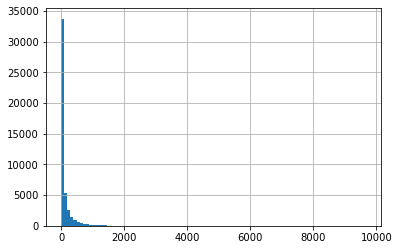

In [104]:
data['Number of Reviews'].hist(bins=100)

In [105]:
data['Number of Reviews'].max()

9660.0

<AxesSubplot:>

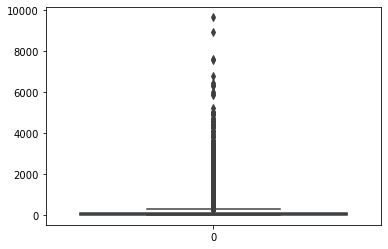

In [106]:
sns.boxplot(data=data['Number of Reviews'])

Number of Reviews - –ø—Ä–∏–∑–Ω–∞–∫ —á–∏—Å–ª–æ–≤–æ–π –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–π.     
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, —Å—Ö–æ–∂–µ–µ –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ü–∞—Ä–µ—Ç–æ - –Ω–µ—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å –æ–±—Ä—ã–≤–æ–º —Å–ª–µ–≤–∞

25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 9.0, 75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 115.0, IQR: 106.0,  –ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [-150.0, 274.0].


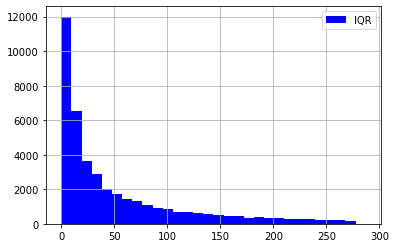

In [107]:
# —Ä–∞—Å—Å—á–∏—Ç–∞–µ–º –≥—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤
median = data['Number of Reviews'].median()
IQR = data['Number of Reviews'].quantile(0.75) - data['Number of Reviews'].quantile(0.25)
perc25 = data['Number of Reviews'].quantile(0.25)
perc75 = data['Number of Reviews'].quantile(0.75)
print('25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: {},'.format(perc25),
      '75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "–ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

#data['Number of Reviews'].loc[data['Number of Reviews'] <= 287].hist(bins = 30, 
#                                  range = (0, 287), 
#                                  color = 'red',
#                                  label = '–ó–¥—Ä–∞–≤—ã–π —Å–º—ã—Å–ª')

data['Number of Reviews'].loc[data['Number of Reviews'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, 
                                                                        range = (0, 287),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [108]:
# –ü—Ä–∏–∑–Ω–∞–∫ Number_of_Reviews_isNAN - –ø—Ä–∏–∑–Ω–∞–∫ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –¥–∞–Ω–Ω—ã—Ö –≤ Number_of_Reviews

data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [114]:
# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å–∞–º–æ–µ —á–∞—Å—Ç–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ - "2" –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –Ω–∞–ª–∏—á–∏—è –¥–∞—Ç—ã –æ—Ç–∑—ã–≤–∞, 
# –µ—Å–ª–∏ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Ä–µ—Å—Ç–æ—Ä–∞–Ω –±–µ–∑ –¥–∞—Ç—ã –æ—Ç–∑—ã–≤–∞, –∑–∞–ø–æ–ª–Ω—è–µ–º –Ω—É–ª—ë–º 

data['Number of Reviews'] = data.apply(lambda x: (0 if x.Rev_date_1 == 'NaT' else 2) if pd.isna(x['Number of Reviews']) else x['Number of Reviews'], axis=1)

In [118]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 213 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Restaurant_id            49963 non-null  float64       
 1   City                     49963 non-null  object        
 2   Cuisine Style            49963 non-null  object        
 3   Ranking                  49963 non-null  float64       
 4   Rating                   49963 non-null  float64       
 5   Price Range              49963 non-null  float64       
 6   Number of Reviews        49963 non-null  float64       
 7   URL_TA                   49963 non-null  object        
 8   ID_TA                    49963 non-null  object        
 9   sample                   49963 non-null  int64         
 10  is_capital               49963 non-null  int64         
 11  Amsterdam                49963 non-null  uint8         
 12  Athens                   49963 

### URL_TA     
      
—Å–æ–¥–µ—Ä–∂–∏—Ç –∞–¥—Ä–µ—Å–∞ —Å—Ç—Ä–∞–Ω–∏—á–µ–∫ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –Ω–∞ —Å–∞–π—Ç–µ 'www.tripadvisor.com'
–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω—É–∂–Ω–∞ –≤ —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ –±—ã –±—Ä–∞–ª–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é —Å —Å–∞–π—Ç–∞. –° —Å–∞–π—Ç–∞ –Ω–∏—á–µ–≥–æ –±—Ä–∞—Ç—å –Ω–µ –±—É–¥–µ–º.
–£–¥–∞–ª—è–µ–º.

In [119]:
data.drop(['URL_TA'], axis = 1, inplace = True)

### ID_TA     
     
–ü—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç

In [120]:
data.ID_TA

0         d1912643
1         d7992032
2         d8632781
3         d1358776
4         d6864963
           ...    
49995    d11916827
49996    d12701633
49997    d13198194
49998     d3862815
49999    d10342814
Name: ID_TA, Length: 49963, dtype: object

In [121]:
data['ID_TA'] = data['ID_TA'].str.replace('d', '').astype(int)

<AxesSubplot:>

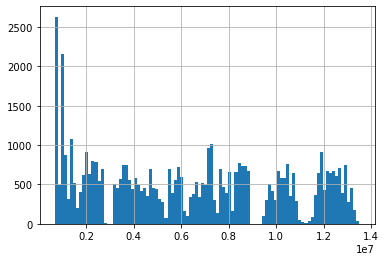

In [122]:
data.ID_TA.hist(bins=100)

<AxesSubplot:>

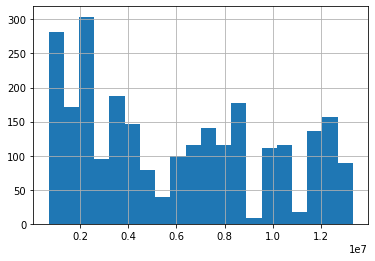

In [123]:
data['ID_TA'][data['City'] =='Rome'].hist(bins=20)

ID_TA - –∏–º–µ–µ–º —Ö–∞–æ—Ç–∏—á–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, —Ö–∞—Ä–∞–∫—Ç–µ—Ä —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è –æ—Ç –≥–æ—Ä–æ–¥–∞ –∫ –≥–æ—Ä–æ–¥—É.

In [124]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 212 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Restaurant_id            49963 non-null  float64       
 1   City                     49963 non-null  object        
 2   Cuisine Style            49963 non-null  object        
 3   Ranking                  49963 non-null  float64       
 4   Rating                   49963 non-null  float64       
 5   Price Range              49963 non-null  float64       
 6   Number of Reviews        49963 non-null  float64       
 7   ID_TA                    49963 non-null  int32         
 8   sample                   49963 non-null  int64         
 9   is_capital               49963 non-null  int64         
 10  Amsterdam                49963 non-null  uint8         
 11  Athens                   49963 non-null  uint8         
 12  Barcelona                49963 

### –ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

<AxesSubplot:>

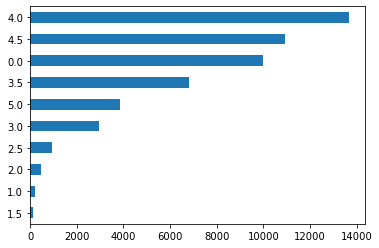

In [125]:
data['Rating'].value_counts(ascending=True).plot(kind='barh')

### –ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

<AxesSubplot:>

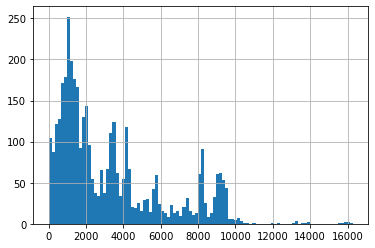

In [126]:
data['Ranking'][data['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

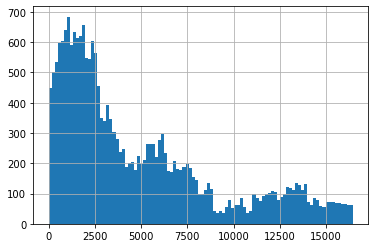

In [127]:
data['Ranking'][data['Rating'] < 4].hist(bins=100)

###  –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [128]:
data.corr()

Restaurant_id   Ranking    Rating  Price Range  \
Restaurant_id                 1.000000  0.825062 -0.257039    -0.020462   
Ranking                       0.825062  1.000000 -0.109796    -0.026298   
Rating                       -0.257039 -0.109796  1.000000    -0.012218   
Price Range                  -0.020462 -0.026298 -0.012218     1.000000   
Number of Reviews            -0.185683 -0.223076  0.011014     0.107826   
...                                ...       ...       ...          ...   
Reviews_isna                  0.086503  0.107375 -0.010396     0.076986   
delta_days                    0.046083  0.061032 -0.016462    -0.026953   
Review_weekday_1             -0.039986 -0.052773  0.005632    -0.035803   
Review_weekday_2             -0.081554 -0.097880  0.002453    -0.031893   
Number_of_Reviews_isNAN       0.076974  0.094786 -0.000529     0.040990   

                         Number of Reviews     ID_TA    sample  is_capital  \
Restaurant_id                    -0.185683  0.039756 -0.147392    0.185461   
Ranking                          -0.223076  0.049752  0.006376    0.224692   
Rating                            0.011014  0.049529  0.936563    0.008658   
Price Range                       0.107826 -0.061741 -0.003431    0.000519   
Number of Reviews                 1.000000 -0.289653  0.002635   -0.000058   
...                                    ...       ...       ...         ...   
Reviews_isna                     -0.163791  0.247782 -0.002795   -0.096041   
delta_days                       -0.080915 -0.177174 -0.004310    0.001018   
Review_weekday_1                  0.081539 -0.125029  0.004047    0.043468   
Review_weekday_2                  0.146122 -0.194221 -0.000413    0.044480   
Number_of_Reviews_isNAN          -0.104783  0.179225 -0.003376    0.006631   

                         Amsterdam    Athens  ...  min_max_Ranking  \
Restaurant_id            -0.075454 -0.077948  ...         0.469285   
Ranking                  -0.094143 -0.094513  ...         0.570810   
Rating                    0.007514  0.016903  ...        -0.168608   
Price Range              -0.003028 -0.023958  ...        -0.043937   
Number of Reviews         0.014541 -0.012791  ...        -0.407150   
...                            ...       ...  ...              ...   
Reviews_isna             -0.055343 -0.012688  ...         0.295451   
delta_days               -0.019426 -0.000040  ...         0.103171   
Review_weekday_1          0.014943  0.005176  ...        -0.152575   
Review_weekday_2          0.037306  0.001114  ...        -0.243984   
Number_of_Reviews_isNAN  -0.009441  0.003503  ...         0.209575   

                         relative_rank  rewiew_in_City  relative_rank_review  \
Restaurant_id                 0.456258        0.540604              0.199599   
Ranking                       0.554919        0.655932              0.242922   
Rating                       -0.168537       -0.006782             -0.134931   
Price Range                  -0.042807       -0.023056              0.011994   
Number of Reviews            -0.407641        0.084751             -0.346077   
...                                ...             ...                   ...   
Reviews_isna                  0.295699       -0.071923              0.255866   
delta_days                    0.103276       -0.016548              0.105385   
Review_weekday_1             -0.152716        0.047442             -0.133774   
Review_weekday_2             -0.244122        0.055987             -0.215025   
Number_of_Reviews_isNAN       0.210138       -0.038931              0.198261   

                         Price Range_isNAN  Reviews_isna  delta_days  \
Restaurant_id                     0.189696      0.086503    0.046083   
Ranking                           0.233893      0.107375    0.061032   
Rating                           -0.020528     -0.010396   -0.016462   
Price Range                       0.209000      0.076986   -0.026953   
Number of Reviews        

<AxesSubplot:>

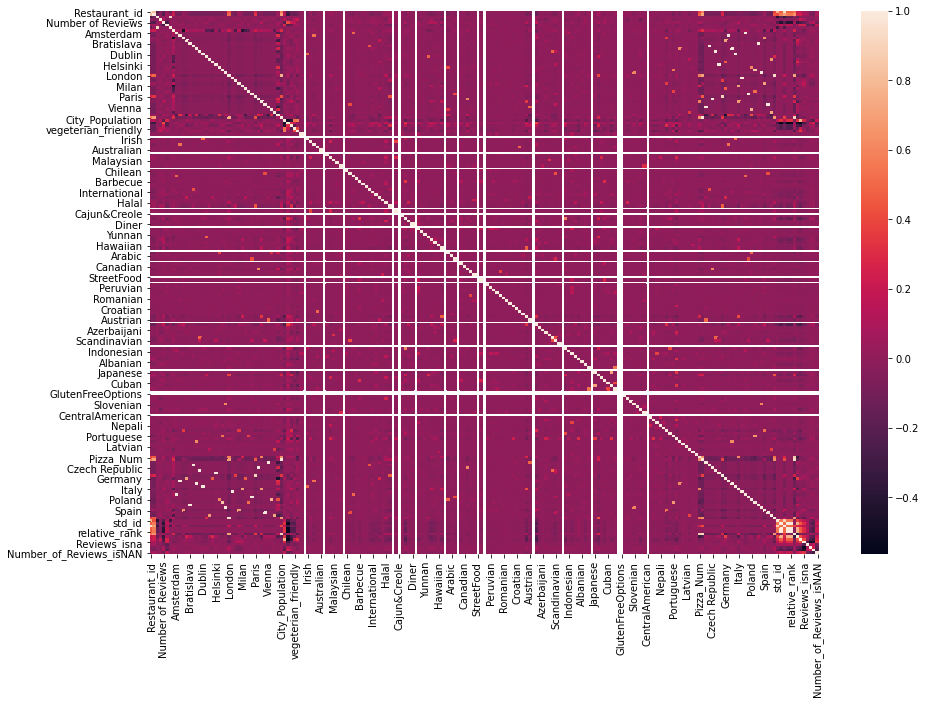

In [129]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.corr(),)

# Data Preprocessing
–¢–µ–ø–µ—Ä—å, –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ –∫–æ–¥–∞, –∑–∞–≤–µ—Ä–Ω–µ–º –≤—Å—é –æ–±—Ä–∞–±–æ—Ç–∫—É –≤ –æ–¥–Ω—É –±–æ–ª—å—à—É—é —Ñ—É–Ω–∫—Ü–∏—é.

In [130]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ ############################################################## 
    # —É–±–∏—Ä–∞–µ–º –Ω–µ –Ω—É–∂–Ω—ã–µ –¥–ª—è –º–æ–¥–µ–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏
    df_output.drop(['City','Cuisine Style', 'Country', 'Rev_txt_1', 'Rev_txt_2', 'Rev_date_1', 'Rev_date_2'], axis = 1, inplace=True)
    #df_output.drop(['std_Ranking'], axis = 1, inplace=True)
    
    # ################### 2. NAN ############################################################## 
    # –î–∞–ª–µ–µ –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏, –≤—ã –º–æ–∂–µ—Ç–µ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ–º —Å—Ä–µ–¥–Ω–∏–º –∏–ª–∏ —Å—Ä–µ–¥–Ω–∏–º –ø–æ –≥–æ—Ä–æ–¥—É –∏ —Ç–¥...
    #df_output['Number of Reviews'].fillna(0, inplace=True)
    # —Ç—É—Ç –≤–∞—à –∫–æ–¥ –ø–æ –æ–±—Ä–∞–±–æ—Ç–∫–µ NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # –¥–ª—è One-Hot Encoding –≤ pandas –µ—Å—Ç—å –≥–æ—Ç–æ–≤–∞—è —Ñ—É–Ω–∫—Ü–∏—è - get_dummies. –û—Å–æ–±–µ–Ω–Ω–æ —Ä–∞–¥—É–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä dummy_na
    #df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # —Ç—É—Ç –≤–∞—à –∫–æ–¥ –Ω–µ Encoding —Ñ–∏—Ç—á–µ–π
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # —Ç—É—Ç –≤–∞—à –∫–æ–¥ –Ω–µ –≥–µ–Ω–µ—Ä–∞—Ü–∏—é –Ω–æ–≤—ã—Ö —Ñ–∏—Ç—á–µ–π
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # —É–±–∏—Ä–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–æ—Ç–æ—Ä—ã–µ –µ—â–µ –Ω–µ —É—Å–ø–µ–ª–∏ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å, 
    # –º–æ–¥–µ–ª—å –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö —Å dtypes "object" –æ–±—É—á–∞—Ç—å—Å—è –Ω–µ –±—É–¥–µ—Ç, –ø—Ä–æ—Å—Ç–æ –≤—ã–±–µ—Ä–∏–º –∏—Ö –∏ —É–¥–∞–ª–∏–º
    
    #object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    #df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

#### –ó–∞–ø—É—Å–∫–∞–µ–º –∏ –ø—Ä–æ–≤–µ—Ä—è–µ–º —á—Ç–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å

In [131]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

Restaurant_id  Ranking  Rating  Price Range  Number of Reviews  \
49665         9665.0    499.0     0.0          2.0               72.0   
34625         9952.0   9961.0     4.0          2.0                8.0   
17840        15516.0  15528.0     2.0          2.0              138.0   
49064         9064.0   8589.0     0.0          2.0                5.0   
18916          669.0    670.0     4.0          1.0               31.0   
26411        10431.0  10440.0     4.0          2.0                6.0   
43727         3727.0  13901.0     0.0          2.0                4.0   
2269          2825.0   2827.0     4.0          2.0               22.0   
8881          7496.0   7497.0     3.5          2.0              191.0   
9314         10224.0  10226.0     3.5          2.0               12.0   

          ID_TA  sample  is_capital  Amsterdam  Athens  ...  min_max_Ranking  \
49665   6962339       0           1          0       0  ...         0.253067   
34625  10746398       1           1          0       0  ...         0.605729   
17840   3308754       1           1          0       0  ...         0.944292   
49064   8685566       0           1          0       0  ...         0.975023   
18916   1009001       1           0          0       0  ...         0.538214   
26411  12588034       1           1          0       0  ...         0.634860   
43727   4961425       0           1          0       0  ...         0.993921   
2269    3561734       1           0          0       0  ...         0.450430   
8881    1540153       1           1          0       0  ...         0.535936   
9314   12716619       1           1          0       0  ...         0.731102   

       relative_rank  rewiew_in_City  relative_rank_review  Price Range_isNAN  \
49665       0.596890        122804.0              0.004063                  0   
34625       1.384819        933770.0              0.010668                  1   
17840       2.158765        933770.0              0.016629                  0   
49064       2.252557        357185.0              0.024046                  1   
18916       1.209386         67635.0              0.009906                  0   
26411       1.451411        933770.0              0.011180                  0   
43727       2.275868        680827.0              0.020418                  0   
2269        1.049369        431350.0              0.006554                  1   
8881        1.227407        680827.0              0.011012                  0   
9314        1.674198        680827.0              0.015020                  0   

       Reviews_isna  delta_days  Review_weekday_1  Review_weekday_2  \
49665             0        25.0               6.0               2.0   
34625             0        11.0               2.0               5.0   
17840             0        15.0               4.0               3.0   
49064             1         0.0               0.0               0.0   
18916             0       394.0               4.0               2.0   
26411             0        47.0               5.0               0.0   
43727             1         0.0               0.0               0.0   
2269              0       736.0               1.0               0.0   
8881              0       225.0               2.0               1.0   
9314              0        14.0               0.0               0.0   

       Number_of_Reviews_isNAN  
49665                        0  
34625                        0  
17840                        0  
49064                        0  
18916                        0  
26411                        0  
43727                        0  
2269                         0  
8881                         0  
9314                         0  

[10 rows x 205 columns]

In [132]:
df_preproc.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 205 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            49963 non-null  float64
 1   Ranking                  49963 non-null  float64
 2   Rating                   49963 non-null  float64
 3   Price Range              49963 non-null  float64
 4   Number of Reviews        49963 non-null  float64
 5   ID_TA                    49963 non-null  int32  
 6   sample                   49963 non-null  int64  
 7   is_capital               49963 non-null  int64  
 8   Amsterdam                49963 non-null  uint8  
 9   Athens                   49963 non-null  uint8  
 10  Barcelona                49963 non-null  uint8  
 11  Berlin                   49963 non-null  uint8  
 12  Bratislava               49963 non-null  uint8  
 13  Brussels                 49963 non-null  uint8  
 14  Budapest             

In [133]:
# –¢–µ–ø–µ—Ä—å –≤—ã–¥–µ–ª–∏–º —Ç–µ—Å—Ç–æ–≤—É—é —á–∞—Å—Ç—å
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # –Ω–∞—à —Ç–∞—Ä–≥–µ—Ç
X = train_data.drop(['Rating'], axis=1)

**–ü–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ –æ—Ç–ø—Ä–∞–≤–ª—è—Ç—å –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ, —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –µ—â–µ –æ–¥–∏–Ω —Ç–µ—Å—Ç –∏ —Ç—Ä–µ–π–Ω, –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏. 
–≠—Ç–æ –ø–æ–º–æ–∂–µ—Ç –Ω–∞–º –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –∫–∞–∫ —Ö–æ—Ä–æ—à–æ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç, –¥–æ –æ—Ç–ø—Ä–∞–≤–∫–∏ submissiona –Ω–∞ kaggle.**

In [134]:
# –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ train_test_split –¥–ª—è —Ä–∞–∑–±–∏–≤–∫–∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
# –≤—ã–¥–µ–ª–∏–º 20% –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é (–ø–∞—Ä–∞–º–µ—Ç—Ä test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [135]:
# –ø—Ä–æ–≤–µ—Ä—è–µ–º
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 204), (39963, 204), (39963, 203), (31970, 203), (7993, 203))

# Model 
–°–∞–º ML

In [136]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏:
from sklearn.ensemble import RandomForestRegressor # –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
from sklearn import metrics # –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏

In [137]:
# –°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å (–ù–ê–°–¢–†–û–ô–ö–ò –ù–ï –¢–†–û–ì–ê–ï–ú)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [138]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
model.fit(X_train, y_train)

# –ò—Å–ø–æ–ª—å–∑—É–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ä–µ–π—Ç–∏–Ω–≥–∞ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é y_pred
y_pred = model.predict(X_test)
y_pred = np.round(y_pred*2)/2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [139]:
# –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (y_pred) —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ (y_test), –∏ —Å–º–æ—Ç—Ä–∏–º –Ω–∞—Å–∫–æ–ª—å–∫–æ –æ–Ω–∏ –≤ —Å—Ä–µ–¥–Ω–µ–º –æ—Ç–ª–∏—á–∞—é—Ç—Å—è
# –ú–µ—Ç—Ä–∏–∫–∞ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è Mean Absolute Error (MAE) –∏ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –æ—Ç —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.16808457400225196


<AxesSubplot:>

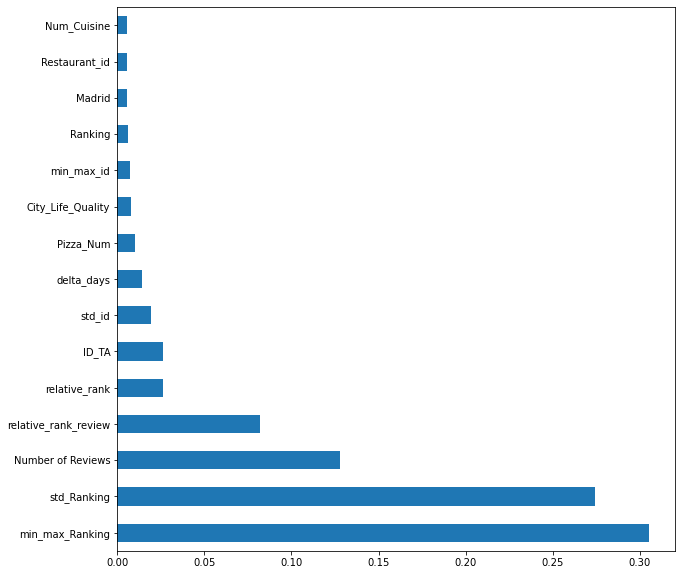

In [140]:
# –≤ RandomForestRegressor –µ—Å—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≤—ã–≤–µ—Å—Ç–∏ —Å–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
–ï—Å–ª–∏ –≤—Å–µ —É—Å—Ç—Ä–∞–µ–≤–∞–µ—Ç - –≥–æ—Ç–æ–≤–∏–º Submission –Ω–∞ –∫–∞–≥–ª

In [141]:
test_data.sample(10)

Restaurant_id  Ranking  Rating  Price Range  Number of Reviews  \
49481         9481.0    171.0     0.0          2.0              406.0   
45861         5861.0  10326.0     0.0          2.0                6.0   
44560         4560.0   3128.0     0.0          2.0                2.0   
43747         3747.0   9481.0     0.0          2.0               25.0   
47975         7975.0  12829.0     0.0          1.0                9.0   
41290         1290.0   1384.0     0.0          2.0                2.0   
45486         5486.0   1074.0     0.0          2.0              108.0   
45504         5504.0   1381.0     0.0          2.0                5.0   
45541         5541.0   1114.0     0.0          2.0               92.0   
45907         5907.0    912.0     0.0          2.0              231.0   

          ID_TA  is_capital  Amsterdam  Athens  Barcelona  ...  \
49481   2660448           0          0       0          0  ...   
45861   9881026           1          0       0          0  ...   
44560   7123669           1          0       0          0  ...   
43747   2042149           1          0       0          0  ...   
47975   4431448           1          0       0          0  ...   
41290  13352421           1          0       0          0  ...   
45486   1186813           0          0       0          0  ...   
45504  11955151           1          0       0          0  ...   
45541   4313151           0          0       0          0  ...   
45907   8397910           1          0       0          0  ...   

       min_max_Ranking  relative_rank  rewiew_in_City  relative_rank_review  \
49481         0.136766       0.308664         67635.0              0.002528   
45861         0.627927       1.435562        933770.0              0.011058   
44560         0.746775       1.722467        199875.0              0.015650   
43747         0.677823       1.552227        680827.0              0.013926   
47975         0.780150       1.783540        933770.0              0.013739   
41290         0.459873       1.053272        113956.0              0.012145   
45486         0.388043       0.937991         82386.0              0.013036   
45504         0.329431       0.760463        199875.0              0.006909   
45541         0.417636       0.989343         93952.0              0.011857   
45907         0.103429       0.239182        357185.0              0.002553   

       Price Range_isNAN  Reviews_isna  delta_days  Review_weekday_1  \
49481                  0             0        18.0               5.0   
45861                  1             0       226.0               2.0   
44560                  1             1         0.0               0.0   
43747                  1             0       198.0               0.0   
47975                  0             0         7.0               6.0   
41290                  1             0         0.0               5.0   
45486                  0             0       115.0               2.0   
45504                  1             0        69.0               5.0   
45541                  0             0        71.0               3.0   
45907                  0             0        28.0               3.0   

       Review_weekday_2  Number_of_Reviews_isNAN  
49481               1.0                        0  
45861               0.0                        0  
44560               0.0                        1  
43747               5.0                        0  
47975               6.0                        0  
41290               0.0                        0  
45486               6.0                        0  
45504               6.0                        0  
45541               2.0                        0  
45907               3.0                        0  

[10 rows x 204 columns]

In [142]:
test_data = test_data.drop(['Rating'], axis=1)

In [143]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [144]:
predict_submission

array([3.18 , 4.23 , 4.385, ..., 3.18 , 3.99 , 4.16 ])

In [145]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

Restaurant_id  Rating
0          id_0   3.180
1          id_1   4.230
2          id_2   4.385
3          id_3   4.330
4          id_4   4.420
5          id_5   4.465
6          id_6   1.585
7          id_7   3.025
8          id_8   4.155
9          id_9   4.630

Score –Ω–∞ Kaggle 0.22520                 